In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime
import random

# About the Dataset:

<b>Information about the data: </b>

<b> About this dataset: </b> <br><br>
- Data in these reference tables have been calculated using Textkernel online job adverts data. They show volumes of online job adverts by different geographies and different occupations detail (see below for definitions).

- These statistics should be treated as official statistics in development (previously known as experimental statistics), as they are still subject to testing the ability to meet user needs and may be modified in the future. More information on official statistics in development can be found here: https://www.ons.gov.uk/methodology/methodologytopicsandstatisticalconcepts/guidetoofficialstatisticsindevelopment

- The data tables in this spreadsheet were published on the 15th March 2024.

<br><b>
Information to consider: </b>
<b> New Adverts: </b> <br><br>
New adverts represent the total number of adverts that have gone online in the month. This metric is calculated by counting the number of adverts that appear for the first time across the calendar month. 

<b> Textkernel Data: </b> <br><br>
Textkernel data is collected using comprehensive web-scraping software which downloads job advert information from approximately 90,000 job boards and recruitment pages. The scraped data includes job titles, descriptions, posting dates and expiration dates. Additionally, Textkernel provide variables which are derived from the scraped data using data science and natural language processing methods. These describe location, salary, seniority, skill requirements, home/office working, and more. Textkernel perform some proprietary data cleaning to identify duplicate job adverts, which ONS have removed in this release. Duplication can occur when the same job is posted on multiple job boards, or when multiple recruiters advertise the job at the same time.

<b> SOC 2020: </b> <br><br>
To evaluate performance of the SOC allocation algorithm, we assessed its accuracy on a manually labelled set of adverts. We found that algorithm accuracy progressively decreased at the more granular levels of the SOC hierarchy, meaning that accuracy was the highest at the level of SOC major groups (1-digit SOC). Hence, the tables shown in this output are less granular for smaller geographies (2-digit) and the lowest level  (4-digit) is only shown for country-level results.

<b> Units, rounding and suppression: </b> <br><br>
Counts have been rounded to the nearest 5. Due to this rounding, aggregations across different tables may not sum to the same value. Note, this is particularly relevant where there are many granular categories of job adverts at one level of geography and occupation detail that would have been rounded to 0, as when aggregated, the sum of these supressed values will be significant. Counts that round to 0 have been replaced with [x].

<b> Quality of Data: </b> <br><br>
Due to the experimental nature of online job advert data, there are some quality aspects to be aware of when using the data. In some cases, there is no clear method to rectify these issues, so they are reported here as a caveat.

Missing information:
ONS has received incorrect delivery of expiration dates during some periods of the timeseries. Textkernel informed us that there was an issue with the data scraping algorithms in 2021. The data scraping software, at that time, reported the expiration of many adverts that were, in fact, still live. Because of this, the data would have showed a large drop-off in volumes, followed by a large spike in the last quarter of 2021, as adverts came back online. ONS has rectified this by imputing new expiration dates throughout the erroneous period, which has had the desired effect of smoothing the timeseries. Expiration dates were imputed for the periods: 1st April 2020 - 7th December 2021. This imputation mostly affects the snapshot metric.Textkernel has updated their methodologies and taxonomies throughout the timeseries back to 2017. This results in changes to classification of locations, which can produce some step-changes in the data.

Geographic allocation:
A substantial proportion of online job adverts have a limited level of granularity regarding location. Textkernel’s default method when assigning adverts to local authority with limited location information was to assign to the centroid of the region. This was most prevalent in London, where Westminster reported much higher counts than the surrounding local authorities as it is the centroid of the region of London. For this release, we have grouped all local authorities of London into the same region. Note, there are also online job adverts that have not been assigned to a local authority district which are shown as 'Unknown', and so when they are mapped to country, region, mayoral combined authority, local skills improvement plan, and local enterprise partnership, those regions only contain adverts that were in a known local authority.

Duplicate adverts:
To remove duplicate advertisements for the same job from the dataset, Textkernel groups 'postings' into 'jobs'. A job advert can be live in the form of many postings, across different websites. ONS uses Textkernel's deduplication method and reports deduplicated counts. However, sometimes 'postings' are grouped together into the same 'job' while their advertising periods do not overlap. This means there is some period of time when the job is not actually being advertised on any website, before it again becomes live on another website. Considering that ONS' focus is on 'live' adverts, we have decided to consider all such separate instances of adverts as two distinct entries, if the period when the 'job' is not on any website is more than two days. This means there will be a new advert counted when its posting becomes live, following a previous posting for the same job that has expired more than two days previously. Similarly, the advert is only counted in the snapshot measure if it is during a period when it is on at least one website.

# SOC2 - Region : TABLE 20

## Loading Dataset and Inspecting Quality

In [2]:
df_t20= pd.read_excel('Data/labourdemandbyoccupation.xlsx', sheet_name='Table 20', skiprows=4)
df_t20.head(2)

Region  SOC 2 digit code                 SOC 2 digit label  Jan-17  \
0  East Midlands                11  Corporate managers and directors    2325   
1  East Midlands                12    Other managers and proprietors    1405   

   Feb-17  Mar-17  Apr-17  May-17  Jun-17  Jul-17  ...  Aug-22  Sep-22  \
0    1975    2395    1950    2195    2090    1670  ...    2675    2460   
1    1230    1465    1260    1480    1560    1135  ...    1760    1660   

   Oct-22  Nov-22 Dec-22  Jan-23  Feb-23  Mar-23  Apr-23  May-23  
0    2680    2730   2200    2485    2150    2165    1815    2255  
1    1765    1650   1400    1805    1405    1540    1255    1495  

[2 rows x 80 columns]

In [3]:
df_t20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Region             234 non-null    object
 1   SOC 2 digit code   234 non-null    int64 
 2   SOC 2 digit label  234 non-null    object
 3   Jan-17             234 non-null    int64 
 4   Feb-17             234 non-null    int64 
 5   Mar-17             234 non-null    int64 
 6   Apr-17             234 non-null    int64 
 7   May-17             234 non-null    int64 
 8   Jun-17             234 non-null    int64 
 9   Jul-17             234 non-null    int64 
 10  Aug-17             234 non-null    int64 
 11  Sep-17             234 non-null    int64 
 12  Oct-17             234 non-null    int64 
 13  Nov-17             234 non-null    int64 
 14  Dec-17             234 non-null    object
 15  Jan-18             234 non-null    int64 
 16  Feb-18             234 non-null    int64 
 1

In [4]:
# Inspecting Quality of Categorical Variables:
t20_cat = []

for col in df_t20.iloc[:,:3].columns:
    print(col)
    print(df_t20[col].unique())
    print(df_t20[col].nunique())
    t20_cat.append(df_t20[col].nunique())
    print('-----------------------------------------------------------------------------')
    print('-----------------------------------------------------------------------------')


Region
['East Midlands' 'East of England' 'London' 'North East' 'North West'
 'South East' 'South West' 'West Midlands' 'Yorkshire and The Humber']
9
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
SOC 2 digit code
[11 12 21 22 23 24 31 32 33 34 35 41 42 51 52 53 54 61 62 63 71 72 81 82
 91 92]
26
-----------------------------------------------------------------------------
-----------------------------------------------------------------------------
SOC 2 digit label
['Corporate managers and directors' 'Other managers and proprietors'
 'Science, research, engineering and technology professionals'
 'Health professionals' 'Teaching and other educational professionals'
 'Business, media and public service professionals'
 'Science, engineering and technology associate professionals'
 'Health and social care associate professionals'
 'Protective service occupations' 'Culture, media a

In [5]:
# Checking nulls and [x] values:
df_t20.isnull().sum().sum()

0

<b> Nulls and [x] can be changed to 0 --> Information in 1. About the Dataset

In [6]:
# Inspecting Jan-17
df_t20['Jan-17'].value_counts()

970     2
25      2
480     2
640     2
3875    2
       ..
545     1
1725    1
1240    1
1055    1
2600    1
Name: Jan-17, Length: 210, dtype: int64

 <b> There exists some nulls and some ['x']

In [7]:
# Replacing with 0 
df_t20.replace('[x]', 0, inplace=True)
df_t20.replace(np.NaN, 0, inplace=True)


# Asserting it works:
assert df_t20.isnull().sum().sum() == 0 # No nulls
assert ('x' in df_t20['Jan-17'].values) == False  # No [x] values

/tmp/ipykernel_140456/866115767.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  assert ('x' in df_t20['Jan-17'].values) == False  # No [x] values


In [8]:
# Changing Monthly Columns to int64 (From Strings)
df_t20.iloc[:, 3:] = df_t20.iloc[:, 3:].astype('int64', errors='raise')
df_t20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 80 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Region             234 non-null    object
 1   SOC 2 digit code   234 non-null    int64 
 2   SOC 2 digit label  234 non-null    object
 3   Jan-17             234 non-null    int64 
 4   Feb-17             234 non-null    int64 
 5   Mar-17             234 non-null    int64 
 6   Apr-17             234 non-null    int64 
 7   May-17             234 non-null    int64 
 8   Jun-17             234 non-null    int64 
 9   Jul-17             234 non-null    int64 
 10  Aug-17             234 non-null    int64 
 11  Sep-17             234 non-null    int64 
 12  Oct-17             234 non-null    int64 
 13  Nov-17             234 non-null    int64 
 14  Dec-17             234 non-null    int64 
 15  Jan-18             234 non-null    int64 
 16  Feb-18             234 non-null    int64 
 1

## Reshaping as Time Series format:

Monthly columns as rows. Date Format on month!

In [9]:
df_t20_ts = pd.melt(df_t20 , id_vars=['Region', 'SOC 2 digit code', 'SOC 2 digit label'], var_name='Date', value_name='Data')
df_t20_ts['Date'] = pd.to_datetime(df_t20_ts['Date'], format='%b-%y', errors='raise')
df_t20_ts.head(2)

Region  SOC 2 digit code                 SOC 2 digit label  \
0  East Midlands                11  Corporate managers and directors   
1  East Midlands                12    Other managers and proprietors   

        Date  Data  
0 2017-01-01  2325  
1 2017-01-01  1405

In [10]:
df_t20_ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18018 entries, 0 to 18017
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Region             18018 non-null  object        
 1   SOC 2 digit code   18018 non-null  int64         
 2   SOC 2 digit label  18018 non-null  object        
 3   Date               18018 non-null  datetime64[ns]
 4   Data               18018 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 704.0+ KB


In [11]:
df_t20_ts["Region"].value_counts()

East Midlands               2002
East of England             2002
London                      2002
North East                  2002
North West                  2002
South East                  2002
South West                  2002
West Midlands               2002
Yorkshire and The Humber    2002
Name: Region, dtype: int64

## Exploratory - New ADS per Region

In [12]:
groupcountry_df_t20_ts = df_t20_ts.groupby(['Date', 'Region']).sum().reset_index().drop(columns='SOC 2 digit code')
groupcountry_df_t20_ts.head(9)

Date                    Region    Data
0 2017-01-01             East Midlands   54535
1 2017-01-01           East of England   80365
2 2017-01-01                    London  249350
3 2017-01-01                North East   20020
4 2017-01-01                North West   85575
5 2017-01-01                South East  145125
6 2017-01-01                South West   84000
7 2017-01-01             West Midlands   97970
8 2017-01-01  Yorkshire and The Humber   62910

In [13]:
fig = px.line(groupcountry_df_t20_ts, x='Date', y='Data', color='Region', title='Jobs Offer (New ADS) by Region')
fig.update_layout(height=800, width=1600)
fig.show()

## Time Series Decomposition - Understanding the Series

Time Series decomposition to understand the Time Series: Which laggings are important? Is it Stationary? 

In [14]:
groupcountry_df_t20_ts_c = groupcountry_df_t20_ts.copy()

Region: East Midlands
----------------------------------------------------------
Additive Decomposition


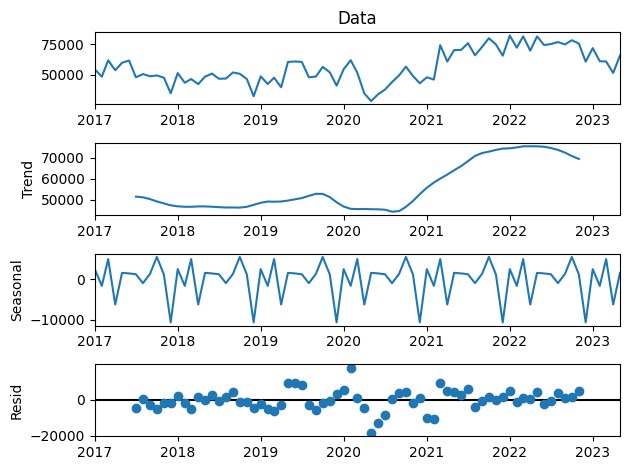

Multiplicative Decomposition


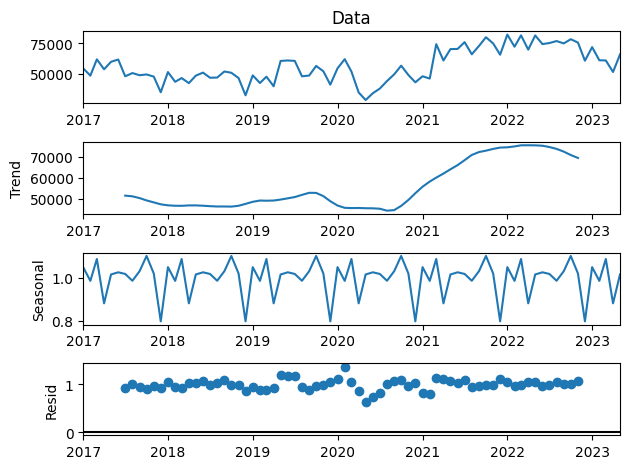

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



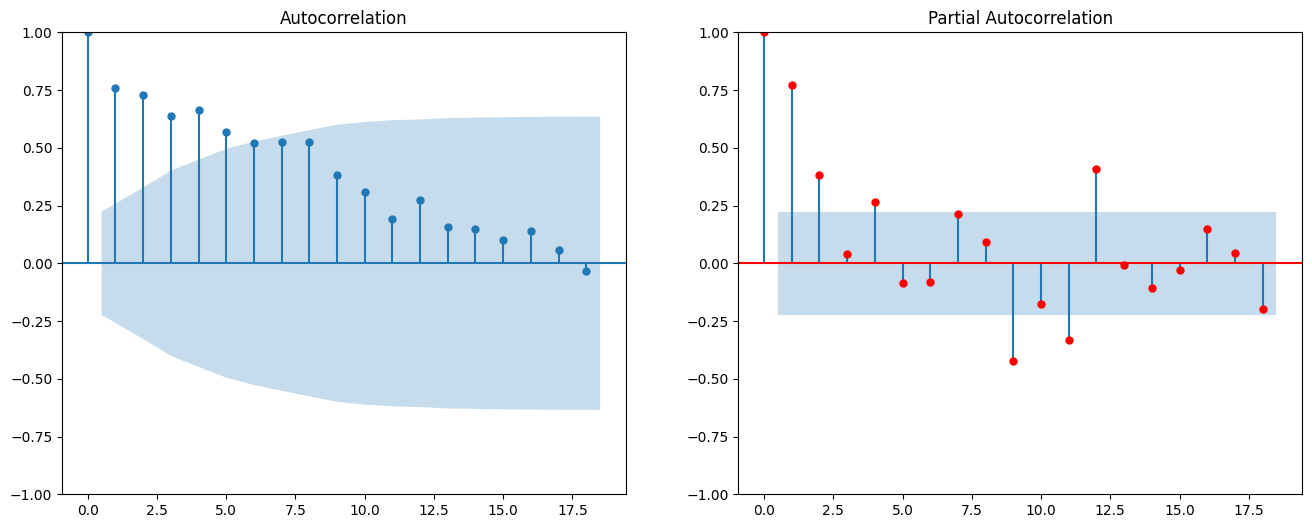

Region: East of England
----------------------------------------------------------
Additive Decomposition


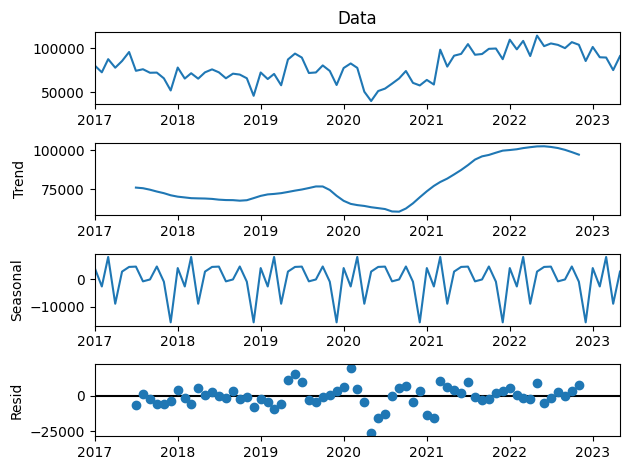

Multiplicative Decomposition


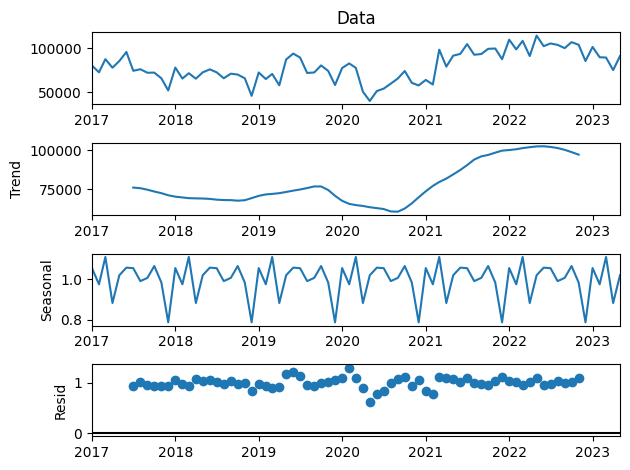

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



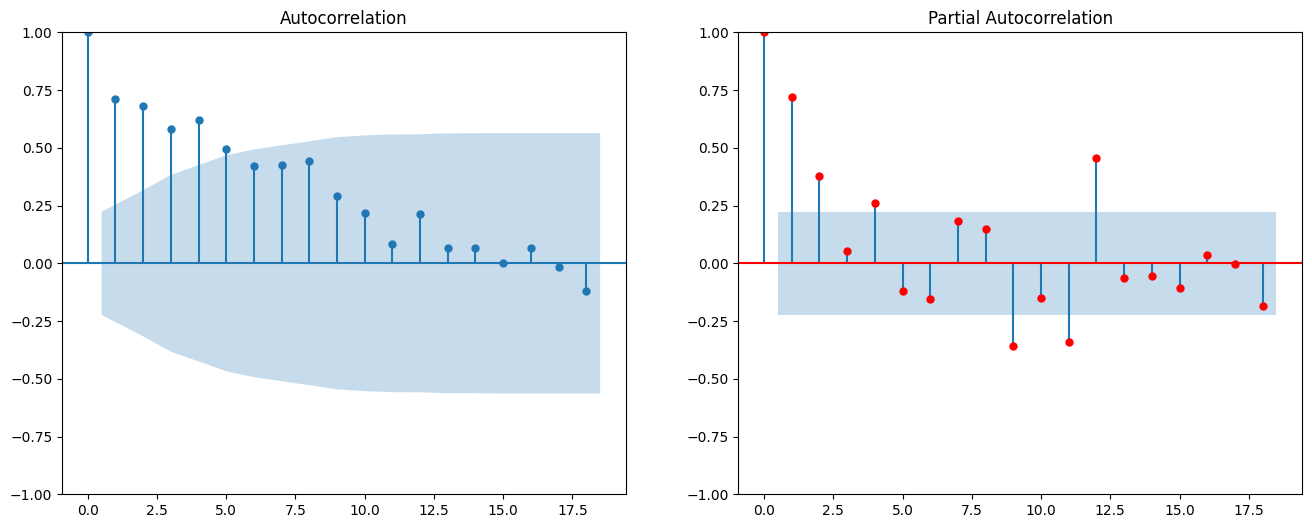

Region: London
----------------------------------------------------------
Additive Decomposition


Multiplicative Decomposition


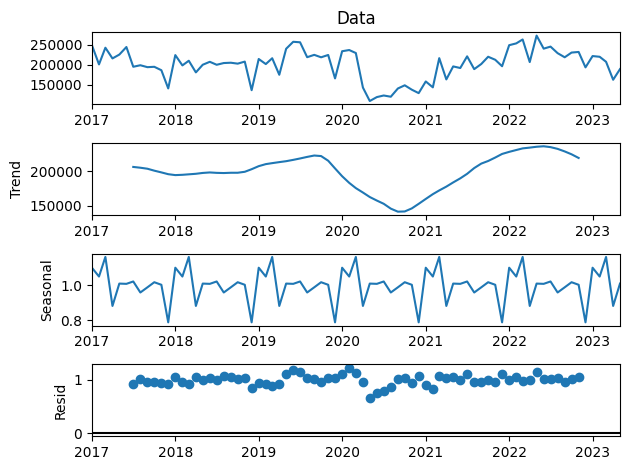

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



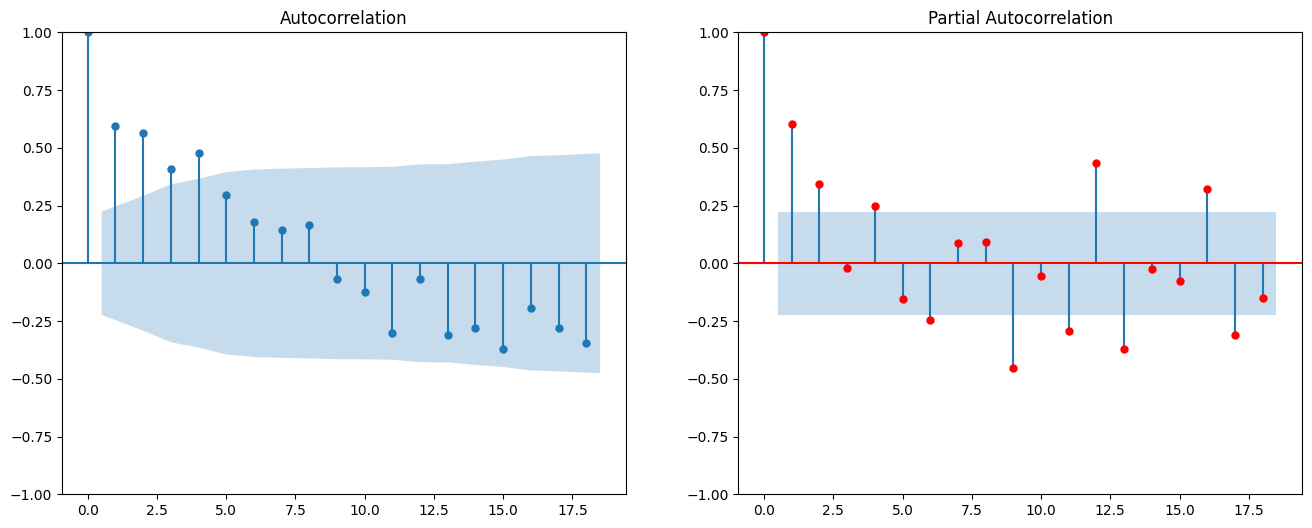

Region: North East
----------------------------------------------------------
Additive Decomposition


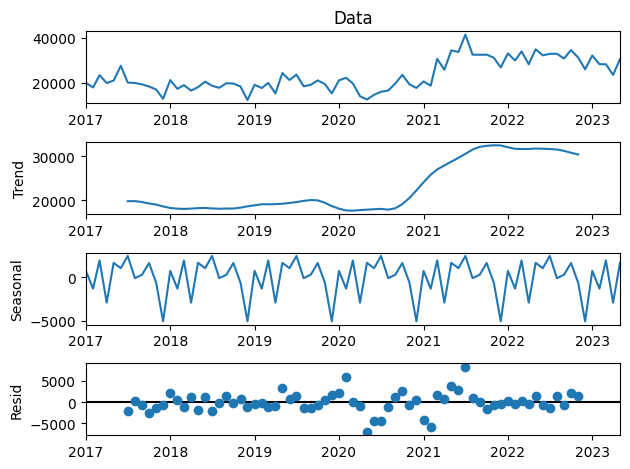

Multiplicative Decomposition


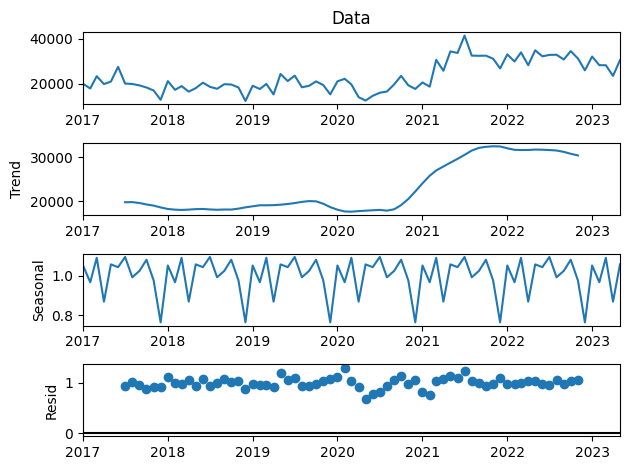

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



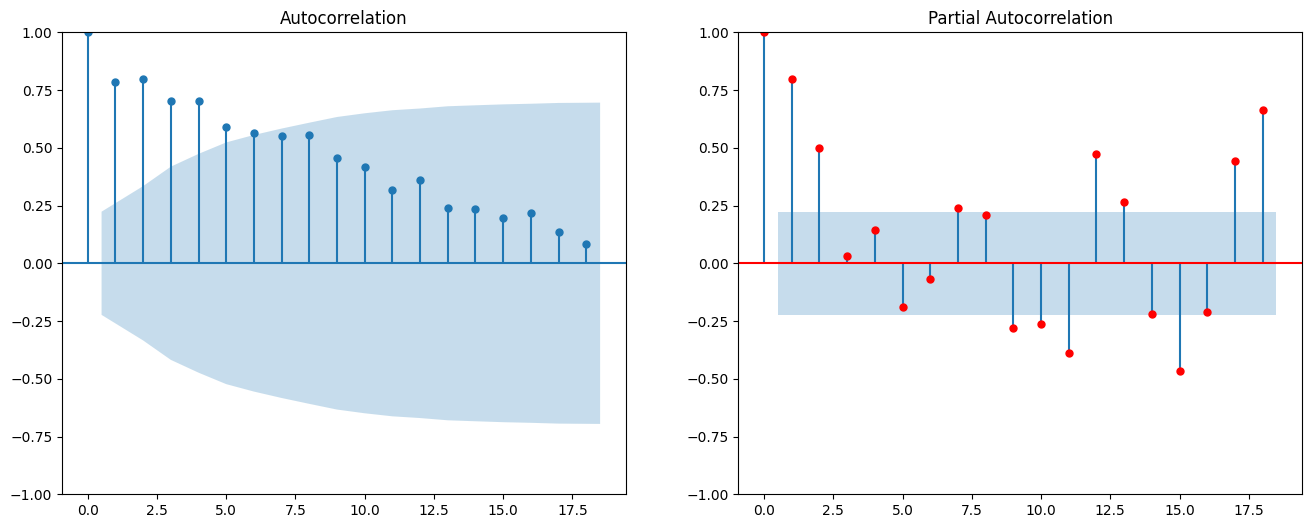

Region: North West
----------------------------------------------------------
Additive Decomposition


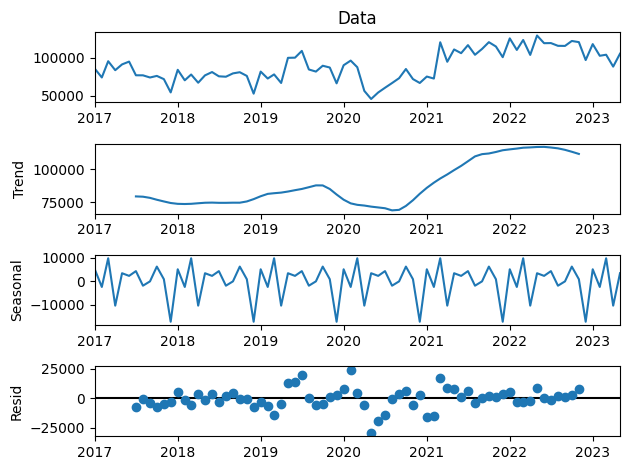

Multiplicative Decomposition


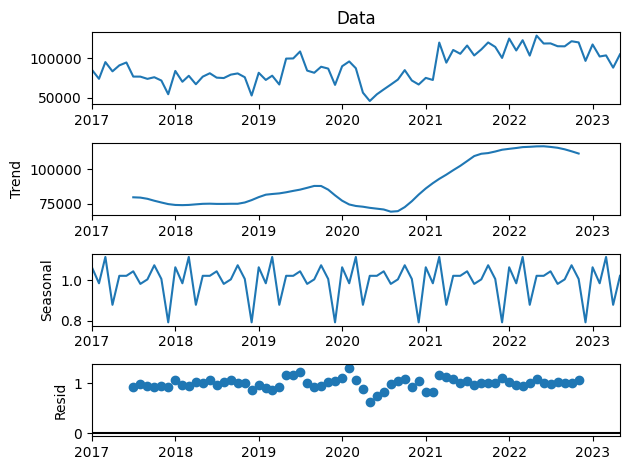

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



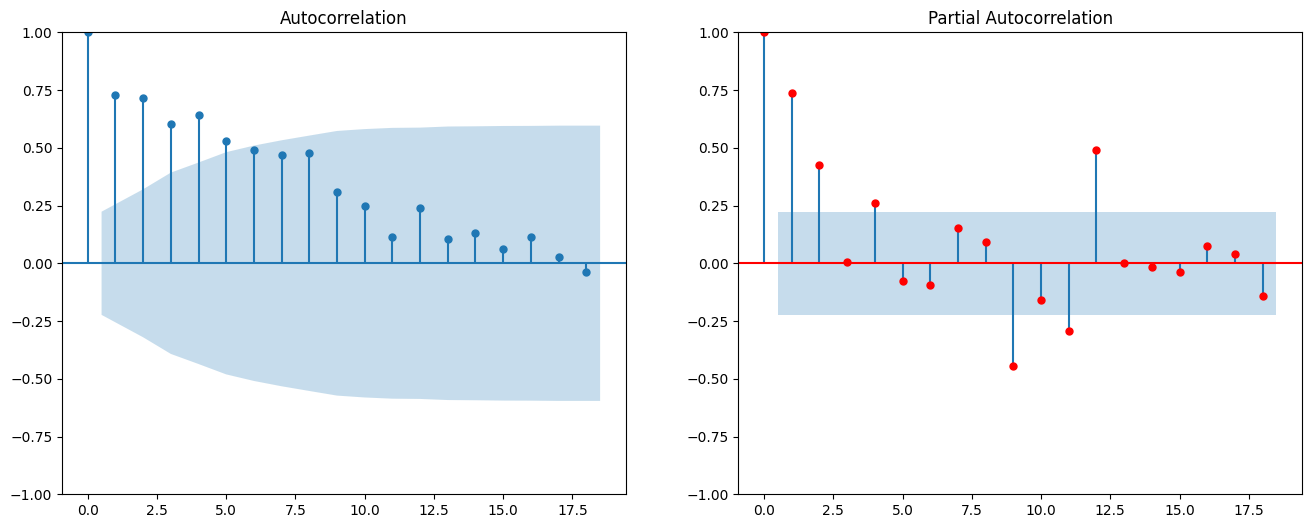

Region: South East
----------------------------------------------------------
Additive Decomposition


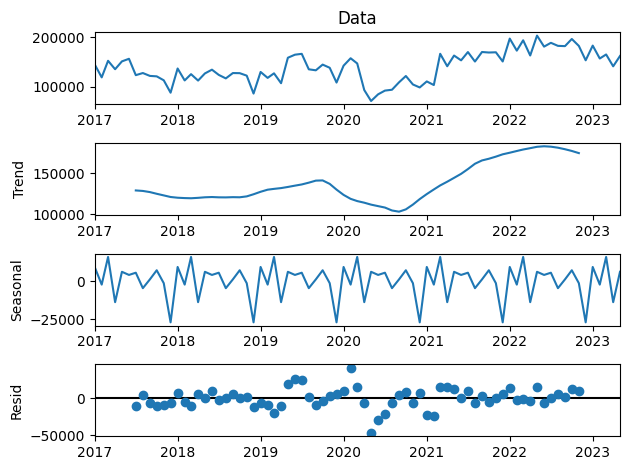

Multiplicative Decomposition


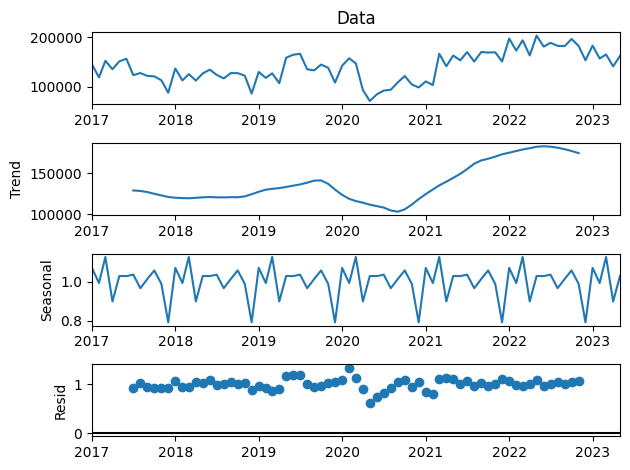

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



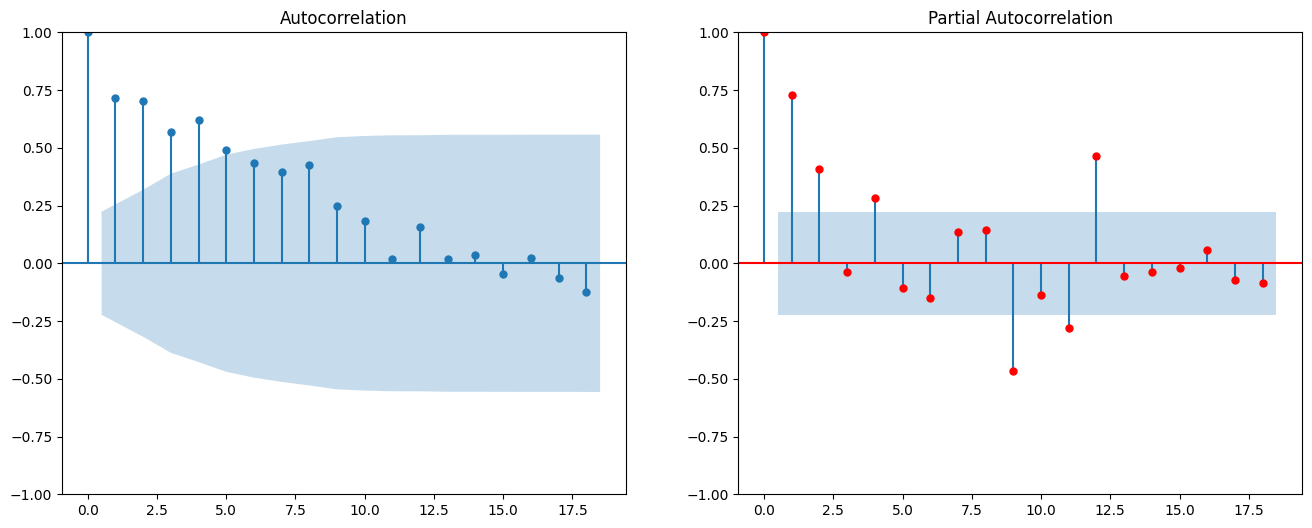

Region: South West
----------------------------------------------------------
Additive Decomposition


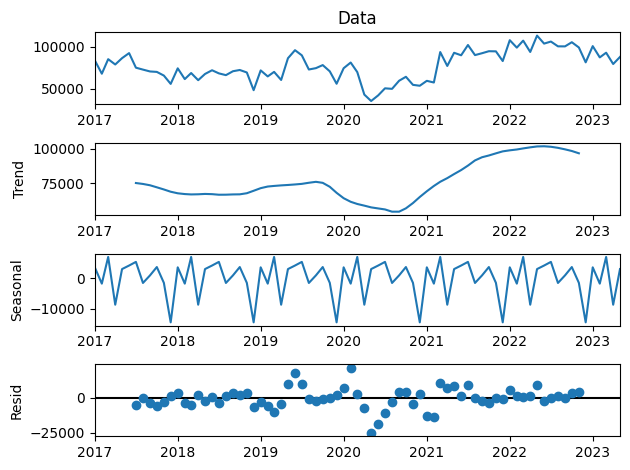

Multiplicative Decomposition


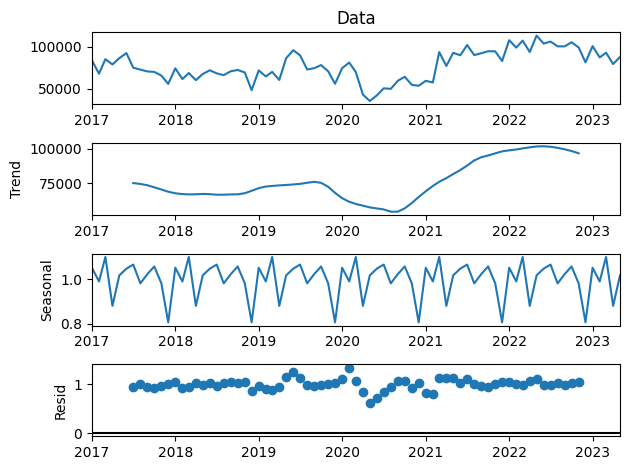

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



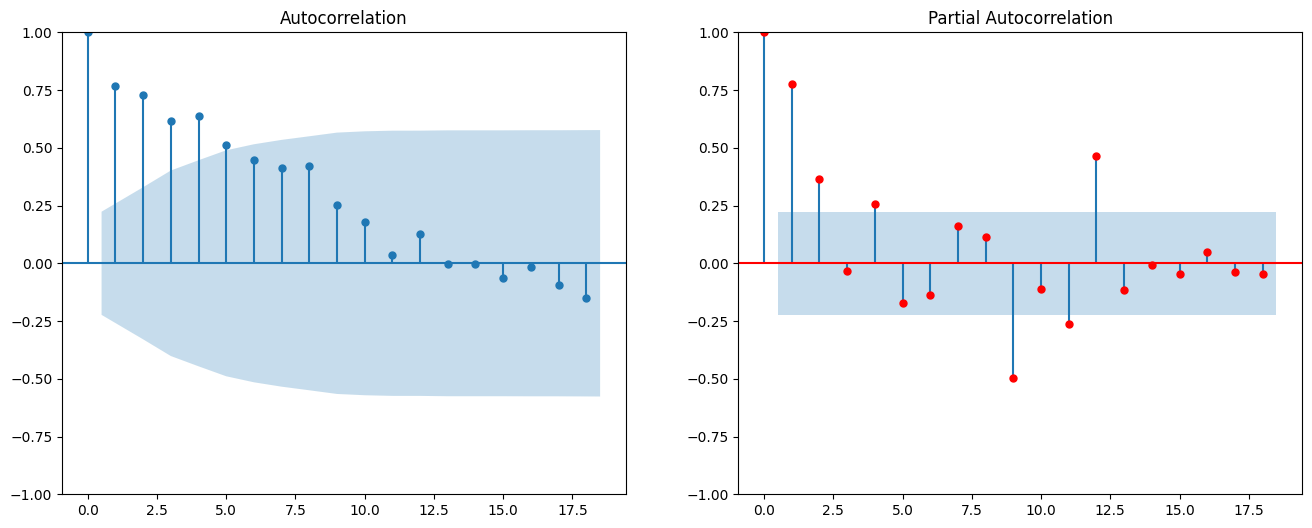

Region: West Midlands
----------------------------------------------------------
Additive Decomposition


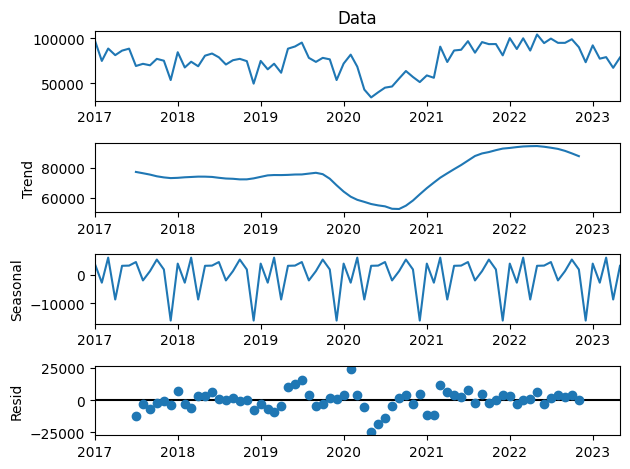

Multiplicative Decomposition


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



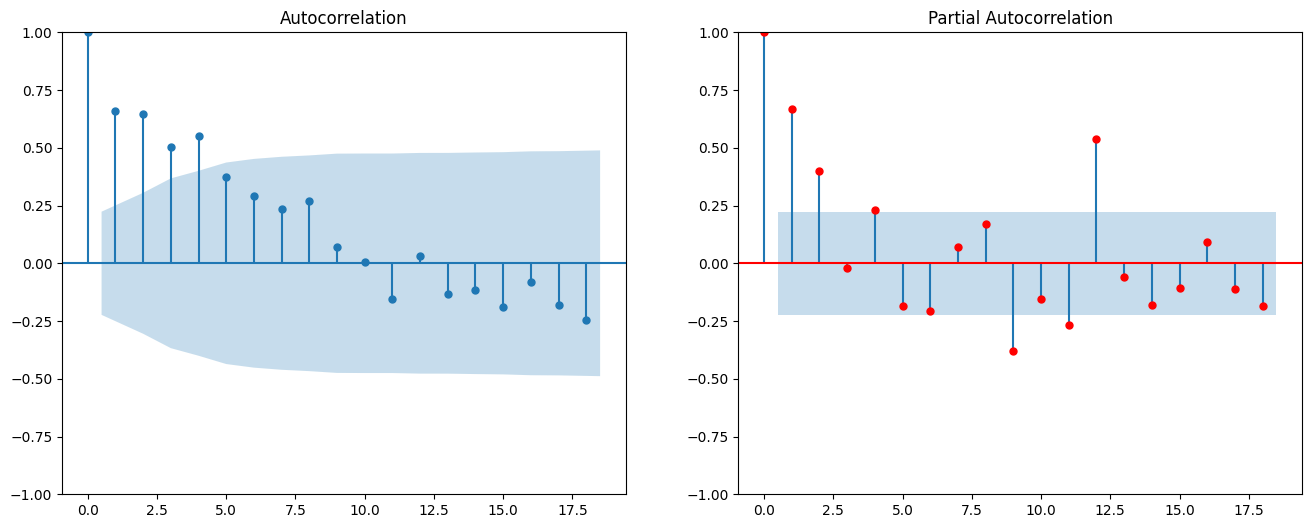

Region: Yorkshire and The Humber
----------------------------------------------------------
Additive Decomposition


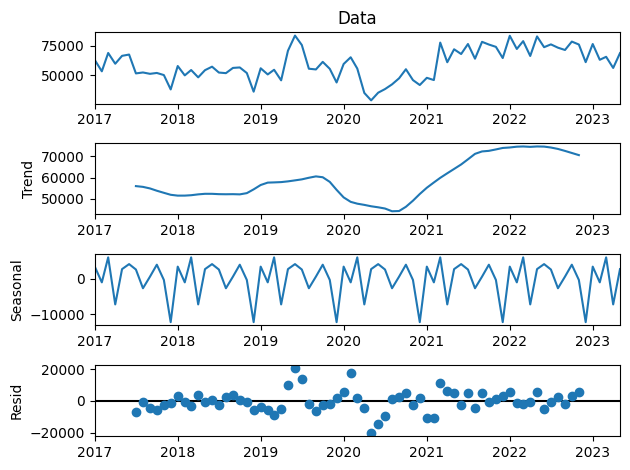

Multiplicative Decomposition


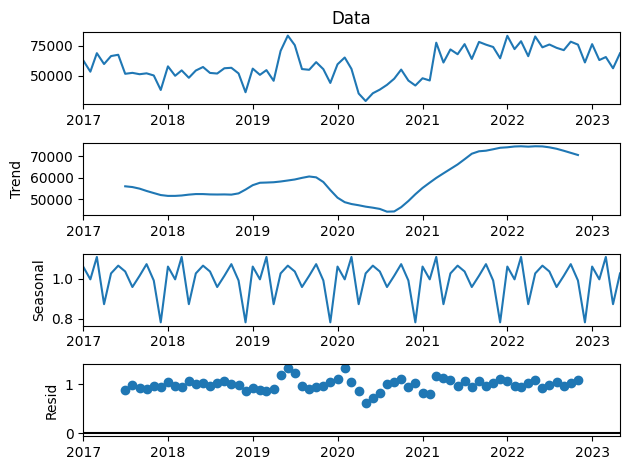

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



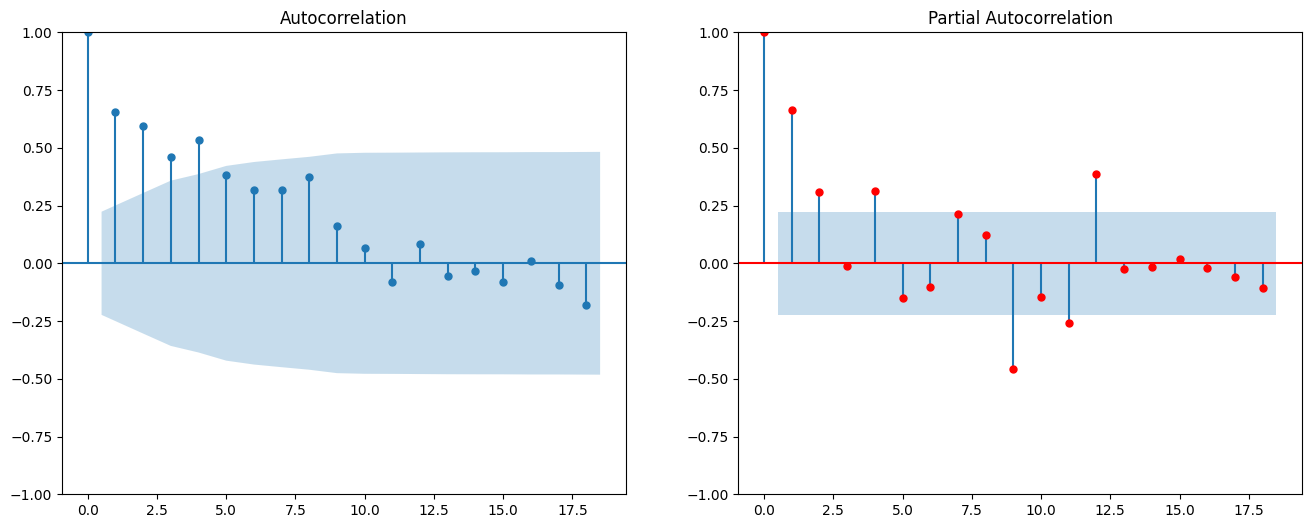

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf


for Region in groupcountry_df_t20_ts_c['Region'].unique():
    temporary_ts = groupcountry_df_t20_ts_c.copy()
    temporary_ts = temporary_ts[temporary_ts["Region"]== Region]
    temporary_ts.set_index('Date', inplace=True)
    temporary_ts.drop(columns='Region', inplace=True)

    print(f'Region: {Region}')
    print("----------------------------------------------------------")

    # Additive Decomposition (y = Trend + Seasonal + Residuals)


    ax1 = seasonal_decompose(temporary_ts['Data'], model='additive').plot()
    print("Additive Decomposition")
    plt.show()
    ax2 = seasonal_decompose(temporary_ts['Data'], model='multiplicative').plot()
    print("Multiplicative Decomposition")
    plt.show()




    fig, axes = plt.subplots(1,2, figsize=(16,6))

    plot_acf(temporary_ts['Data'], lags=18, ax=axes[0]);
    plot_pacf(temporary_ts['Data'], lags=18, ax=axes[1], color='r')
    plt.show()

# Modelling XGBooster by Region by SOC2

## Preparing the dataset for XGBooster:

In [16]:
df_t20_ts.rename(columns = { "SOC 2 digit code": "SOC2", "SOC 2 digit label": "SOC2NAME"},inplace = True)

In [17]:
# Creatung OHE on Region:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output = False)

ohe.fit(df_t20_ts[['Region']])


df_t20_ts[ohe.get_feature_names_out()] = ohe.transform(df_t20_ts[["Region"]])

In [18]:
# Creating COVID feature: 02/2020 to 12/2020

df_t20_ts['covid'] = df_t20_ts['Date'].apply(lambda x: 1 if x.month >= 2 and x.year == 2020 and x.month <= 12 else 0)
df_t20_ts.head(2)

Region  SOC2                          SOC2NAME       Date  Data  \
0  East Midlands    11  Corporate managers and directors 2017-01-01  2325   
1  East Midlands    12    Other managers and proprietors 2017-01-01  1405   

   Region_East Midlands  Region_East of England  Region_London  \
0                   1.0                     0.0            0.0   
1                   1.0                     0.0            0.0   

   Region_North East  Region_North West  Region_South East  Region_South West  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   

   Region_West Midlands  Region_Yorkshire and The Humber  covid  
0                   0.0                              0.0      0  
1                   0.0                              0.0      0

In [19]:
df_t20_ts[df_t20_ts['covid'] == 1]["Date"].value_counts()

2020-02-01    234
2020-03-01    234
2020-04-01    234
2020-05-01    234
2020-06-01    234
2020-07-01    234
2020-08-01    234
2020-09-01    234
2020-10-01    234
2020-11-01    234
2020-12-01    234
Name: Date, dtype: int64

In [20]:
# Making Date the Index:
df_t20_ts.set_index('Date', inplace=True)
df_t20_ts.head(2)

Region  SOC2                          SOC2NAME  Data  \
Date                                                                      
2017-01-01  East Midlands    11  Corporate managers and directors  2325   
2017-01-01  East Midlands    12    Other managers and proprietors  1405   

            Region_East Midlands  Region_East of England  Region_London  \
Date                                                                      
2017-01-01                   1.0                     0.0            0.0   
2017-01-01                   1.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2017-01-01                0.0                   0.0   
2017-01-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid  
Date                                                
2017-01-01                              0.0      0  
2017-01-01                              0.0      0

In [21]:
# Dropping SOC2Name and Creating Copy in case needed later:
df_t20_ts_copy = df_t20_ts.copy()
df_t20_ts.drop(columns = ["SOC2NAME"], inplace=True)

In [22]:
#Creating variable rows_per_month
df_t20.shape

(234, 80)

In [23]:
rows_per_month_REGION = 234

In [24]:
# Creating Laggings for the model: Lag1,Lag2,Lag3,Lag12 are important (Time Series Decomposition)
df_t20_ts['Lag1'] = df_t20_ts['Data'].shift(1*rows_per_month_REGION)
df_t20_ts['Lag2'] = df_t20_ts['Data'].shift(2*rows_per_month_REGION)
df_t20_ts['Lag3'] = df_t20_ts['Data'].shift(3*rows_per_month_REGION)
df_t20_ts['Lag12'] = df_t20_ts['Data'].shift(12*rows_per_month_REGION)
df_t20_ts.head(rows_per_month_REGION+5)

Region  SOC2  Data  Region_East Midlands  \
Date                                                          
2017-01-01  East Midlands    11  2325                   1.0   
2017-01-01  East Midlands    12  1405                   1.0   
2017-01-01  East Midlands    21  5000                   1.0   
2017-01-01  East Midlands    22  2580                   1.0   
2017-01-01  East Midlands    23  2090                   1.0   
...                   ...   ...   ...                   ...   
2017-02-01  East Midlands    11  1975                   1.0   
2017-02-01  East Midlands    12  1230                   1.0   
2017-02-01  East Midlands    21  4165                   1.0   
2017-02-01  East Midlands    22  2025                   1.0   
2017-02-01  East Midlands    23  1865                   1.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   
...                            ...            ...                ...   
2017-02-01                     0.0            0.0                0.0   
2017-02-01                     0.0            0.0                0.0   
2017-02-01                     0.0            0.0                0.0   
2017-02-01                     0.0            0.0                0.0   
2017-02-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2017-02-01                0.0                0.0                0.0   
2017-02-01                0.0                0.0                0.0   
2017-02-01                0.0                0.0                0.0   
2017-02-01                0.0                0.0                0.0   
2017-02-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   
...                          ...                              ...    ...   
2017-02-01                   0.0                              0.0      0   
2017-02-01                   0.0                              0.0      0   
2017-02-01                   0.0                              0.0      0   
2017-02-01                   0.0                              0.0      0   
2017-02-01                   0.0                              0.0      0   

              Lag1  Lag2  Lag3  Lag12  
Date                                   
2017-01-01     NaN   NaN   NaN    NaN  
2017-01-01     NaN   NaN   NaN    NaN  
2017-01-01     NaN   NaN   NaN    NaN  
2017-01-01     NaN   NaN   NaN    NaN  
2017-01-01     NaN   NaN   NaN    NaN  
...            ...   ...   ...    ...  
2017-02-01  2325.0   NaN   Na

### Adding GDP Growth per Quarter Data --> ONS

Adding GDP Quarter Growth Data: GDP Data came from ONS --> Office of National Statistics

In [25]:
# Adding GDP Quarter Growth Data: GDP Data came from ONS --> Office of National Statistics
gdp = pd.read_csv('Data/gdp.csv')

# Split the 'Date' column into year and quarter
gdp[['Year', 'Quarter']] = gdp['Quarter'].str.split(' ', expand=True)

quarter_to_month = {'Q1': '01', 'Q2': '04', 'Q3': '07', 'Q4': '10'}
gdp['Month'] = gdp['Quarter'].map(quarter_to_month)
gdp['QInit'] = pd.to_datetime(gdp['Year'] + gdp['Month'], format='%Y%m')

# Drop the intermediate columns if not needed
gdp = gdp.drop(columns=['Year', 'Quarter', 'Month'])
gdp.head()

GDP Qgrowth      QInit
0          0.6 2016-10-01
1          0.8 2017-01-01
2          0.6 2017-04-01
3          0.6 2017-07-01
4          0.7 2017-10-01

In [26]:
df_t20_ts['GDPQGrowth'] = gdp.set_index('QInit')['GDP Qgrowth']
df_t20_ts['GDPLag1'] = df_t20_ts['GDPQGrowth'].shift(rows_per_month_REGION*3) #3 months - Quarter
df_t20_ts.tail(rows_per_month_REGION+4)

Region  SOC2  Data  Region_East Midlands  \
Date                                                                     
2023-04-01  Yorkshire and The Humber    81  1890                   0.0   
2023-04-01  Yorkshire and The Humber    82  1565                   0.0   
2023-04-01  Yorkshire and The Humber    91   730                   0.0   
2023-04-01  Yorkshire and The Humber    92  4655                   0.0   
2023-05-01             East Midlands    11  2255                   1.0   
...                              ...   ...   ...                   ...   
2023-05-01  Yorkshire and The Humber    72  1550                   0.0   
2023-05-01  Yorkshire and The Humber    81  2375                   0.0   
2023-05-01  Yorkshire and The Humber    82  1920                   0.0   
2023-05-01  Yorkshire and The Humber    91   840                   0.0   
2023-05-01  Yorkshire and The Humber    92  5855                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2023-04-01                     0.0            0.0                0.0   
2023-04-01                     0.0            0.0                0.0   
2023-04-01                     0.0            0.0                0.0   
2023-04-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   
...                            ...            ...                ...   
2023-05-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2023-04-01                0.0                0.0                0.0   
2023-04-01                0.0                0.0                0.0   
2023-04-01                0.0                0.0                0.0   
2023-04-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2023-04-01                   0.0                              1.0      0   
2023-04-01                   0.0                              1.0      0   
2023-04-01                   0.0                              1.0      0   
2023-04-01                   0.0                              1.0      0   
2023-05-01                   0.0                              0.0      0   
...                          ...                              ...    ...   
2023-05-01                   0.0                              1.0      0   
2023-05-01                   0.0                              1.0      0   
2023-05-01                   0.0                              1.0      0   
2023-05-01                   0.0                              1.0      0   
2023-05-01                   0.0                              1.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPQGrowth  GDPLag1  
Date                                                             
2023-04-01  2185.0  2070.0  2565.0  2345.0         0.0      0.2  
2023-04-01  1470.0 

In [27]:
#Adding GDP for 01-01-2017 (From Q4 2016)
df_t20_ts.loc['2017-01-01', 'GDPLag1'] = 0.6

#Adding for months with no GDP data (The one on top)
df_t20_ts['GDPLag1'] = df_t20_ts['GDPLag1'].fillna(method='ffill')

#Dropping GDPQGrowth:
df_t20_ts.drop(columns = ["GDPQGrowth"], inplace=True)
df_t20_ts.head()

Region  SOC2  Data  Region_East Midlands  \
Date                                                          
2017-01-01  East Midlands    11  2325                   1.0   
2017-01-01  East Midlands    12  1405                   1.0   
2017-01-01  East Midlands    21  5000                   1.0   
2017-01-01  East Midlands    22  2580                   1.0   
2017-01-01  East Midlands    23  2090                   1.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  
Date                                          
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6

In [28]:
fig = px.line(df_t20_ts["GDPLag1"].groupby("Date").mean(),title=f'QGrowthLag')
fig.add_scatter(x=gdp['QInit'], y=gdp['GDP Qgrowth'])
fig.update_layout(height=600, width=1600)
fig.show()

# Red Lines (gdp) has less points, The importance here is to check if they are following the trends after 3 months.

### Train - Test Split: 85%-15% (Similar to this: Train -> Until June 2022)

In [29]:
# Separating Train and Test - 85-15
train_size = 0.85
index = round(train_size * df_t20_ts.shape[0])-105 #-105 to get all Regions until may 2022 for training

agg_ts_train = df_t20_ts.iloc[:index]
agg_ts_test = df_t20_ts.iloc[index:]

agg_ts_train.tail(10)

Region  SOC2  Data  Region_East Midlands  \
Date                                                                     
2022-05-01  Yorkshire and The Humber    54  1470                   0.0   
2022-05-01  Yorkshire and The Humber    61  5455                   0.0   
2022-05-01  Yorkshire and The Humber    62   870                   0.0   
2022-05-01  Yorkshire and The Humber    63    45                   0.0   
2022-05-01  Yorkshire and The Humber    71  2475                   0.0   
2022-05-01  Yorkshire and The Humber    72  1985                   0.0   
2022-05-01  Yorkshire and The Humber    81  2940                   0.0   
2022-05-01  Yorkshire and The Humber    82  2310                   0.0   
2022-05-01  Yorkshire and The Humber    91  1095                   0.0   
2022-05-01  Yorkshire and The Humber    92  6585                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   
2022-05-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   
2022-05-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   
2022-05-01                   0.0                              1.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  
Date                                                 
2022-05-01  1165.0  1475.0  1235.0  1355.0      0.5  
2022-05-01  4575.0  5330.0  4980.0  4680.0      0.5  
2022-05-01   790.0   760.0   860.0   600.0      0.5  
2022-05-01    30.0    35.0    35.0    25.0      0.5  
2022-05-01  2160.0  2380.0  2260.0  1840.0      0.5  
2022-05-01  1635.0  1930.0  1650.0  1310.0      0.5  
2022-05-01  2345.0  2905.0  2705.0  2865.0      0.5  
2022-05-01  1755.0  2355

In [30]:
# Separating X and y:
train_agg_X = agg_ts_train.drop(columns = ["Data"])
train_agg_y = agg_ts_train[["Data"]]
test_agg_X = agg_ts_test.drop(columns = ["Data"])
test_agg_y = agg_ts_test[["Data"]]

In [31]:
# Saving a copy of testing dataset for previous work
Date_Country = test_agg_X.copy()
Date_Country

Region  SOC2  Region_East Midlands  \
Date                                                               
2022-06-01             East Midlands    11                   1.0   
2022-06-01             East Midlands    12                   1.0   
2022-06-01             East Midlands    21                   1.0   
2022-06-01             East Midlands    22                   1.0   
2022-06-01             East Midlands    23                   1.0   
...                              ...   ...                   ...   
2023-05-01  Yorkshire and The Humber    72                   0.0   
2023-05-01  Yorkshire and The Humber    81                   0.0   
2023-05-01  Yorkshire and The Humber    82                   0.0   
2023-05-01  Yorkshire and The Humber    91                   0.0   
2023-05-01  Yorkshire and The Humber    92                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
...                            ...            ...                ...   
2023-05-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   
2023-05-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2022-06-01                   0.0                              0.0      0   
2022-06-01                   0.0                              0.0      0   
2022-06-01                   0.0                              0.0      0   
2022-06-01                   0.0                              0.0      0   
2022-06-01                   0.0                              0.0      0   
...                          ...                              ...    ...   
2023-05-01                   0.0                              1.0      0   
2023-05-01                   0.0                              1.0      0   
2023-05-01                   0.0                              1.0      0   
2023-05-01                   0.0                              1.0      0   
2023-05-01                   0.0                              1.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  
Date                                                 
2022-06-01  3110.0  2575.0  3090.0  2625.0      0.5  
2022-06-01  1890.0  1695.0  1910.0  1660.0      0.5  
2022-06-01  5715.0  4805.0  5760.0  4625.0      0.5  
2022-06-01  4610.0  3995.

In [32]:
# Drop Region column = OHE instead
train_agg_X.drop(columns='Region', inplace=True)
test_agg_X.drop(columns='Region', inplace=True)

In [33]:
test_agg_X.head(2)

SOC2  Region_East Midlands  Region_East of England  Region_London  \
Date                                                                            
2022-06-01    11                   1.0                     0.0            0.0   
2022-06-01    12                   1.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2022-06-01                              0.0      0  3110.0  2575.0  3090.0   
2022-06-01                              0.0      0  1890.0  1695.0  1910.0   

             Lag12  GDPLag1  
Date                         
2022-06-01  2625.0      0.5  
2022-06-01  1660.0      0.5

In [34]:
test_agg_X.shape

(2808, 16)

In [35]:
test_agg_y.shape

(2808, 1)

## Modelling

In [36]:
def rmspe(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred)) / np.mean(y_true)

In [37]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [38]:
basemodel= XGBRegressor(n_jobs=-1).fit(train_agg_X, train_agg_y)

#Predictions
predict_train= np.round(basemodel.predict(train_agg_X))
predict_val= basemodel.predict(test_agg_X)
predict_val= np.round(predict_val)

#RMSPE
rmse_trainb=rmspe(train_agg_y, predict_train)
rmse_valb=rmspe(test_agg_y, predict_val)

print(f"Training Error: {rmse_trainb} \nValidation Error: {rmse_valb}")

Training Error: Data    0.104011
dtype: float64 
Validation Error: Data    0.194013
dtype: float64


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'

/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



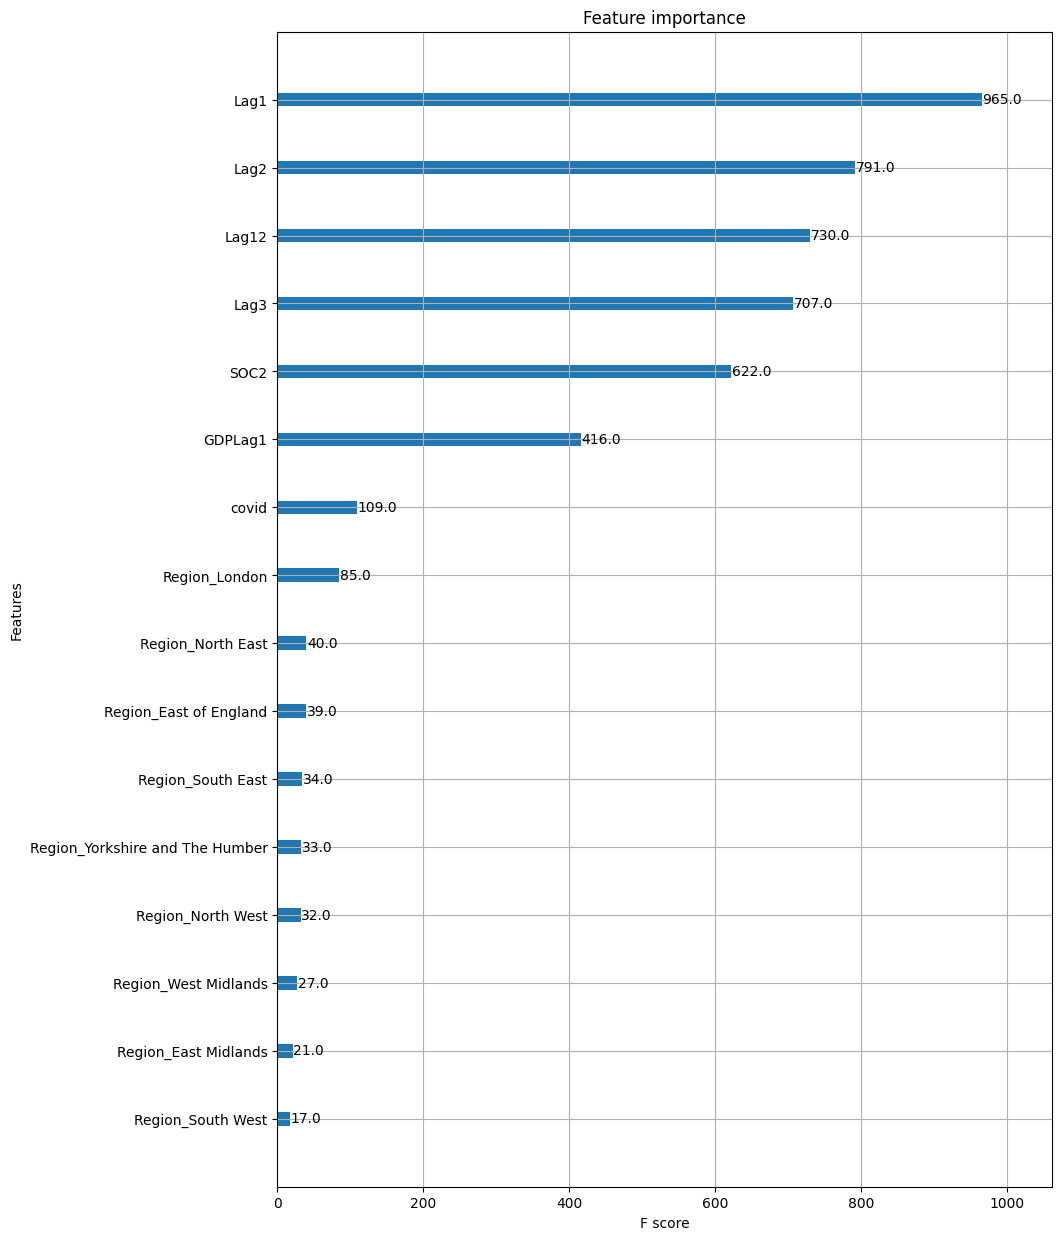

In [39]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 15))
plot_importance(basemodel, ax=ax)
plt.show()

 <b> The Laggings have some Data Leakage as Features on Testing X. 

### Results Without Data Leakeage (Assuming Predictions as True Values)

In [40]:
test_agg_X2 = test_agg_X.copy()

In [41]:
total_months_predict = 12

In [42]:
rows_per_month = 234

In [43]:
test_agg_X2["Prediction"] = -9999
test_agg_X2.head()

SOC2  Region_East Midlands  Region_East of England  Region_London  \
Date                                                                            
2022-06-01    11                   1.0                     0.0            0.0   
2022-06-01    12                   1.0                     0.0            0.0   
2022-06-01    21                   1.0                     0.0            0.0   
2022-06-01    22                   1.0                     0.0            0.0   
2022-06-01    23                   1.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2022-06-01                              0.0      0  3110.0  2575.0  3090.0   
2022-06-01                              0.0      0  1890.0  1695.0  1910.0   
2022-06-01                              0.0      0  5715.0  4805.0  5760.0   
2022-06-01                              0.0      0  4610.0  3995.0  4600.0   
2022-06-01                              0.0      0  2505.0  2130.0  2505.0   

             Lag12  GDPLag1  Prediction  
Date                                     
2022-06-01  2625.0      0.5       -9999  
2022-06-01  1660.0      0.5       -9999  
2022-06-01  4625.0      0.5       -9999  
2022-06-01  3575.0      0.5       -9999  
2022-06-01  2305.0      0.5       -9999

In [44]:
# Logic to run 1 by 1 the predictions and use the predicted values as laggings for Future!
for x in range(1, total_months_predict + 1):

    df_tmp = test_agg_X2.iloc[(x-1)*rows_per_month:x*rows_per_month]
    df_tmp.drop(columns = "Prediction", inplace = True)
    
    predict_val_2= np.round(basemodel.predict(df_tmp)).tolist()
    
    #Changing predictions on test_agg_X2
    test_agg_X2.loc[(x-1)*rows_per_month:x*rows_per_month, "Prediction"] = predict_val_2
    
    #Changing Lags with predictions on test_agg_X2
    if x+11 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 2:x*rows_per_month+rows_per_month * 3, "Lag3"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 11:x*rows_per_month+rows_per_month * 12, "Lag12"] = predict_val_2
    
    elif x+2 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month * 2:x*rows_per_month+rows_per_month * 3, "Lag3"] = predict_val_2
    
    elif x+1 < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
        test_agg_X2.loc[x*rows_per_month+rows_per_month:x*rows_per_month+rows_per_month * 2, "Lag2"] = predict_val_2
        
    elif x < total_months_predict:
        test_agg_X2.loc[x*rows_per_month:x*rows_per_month+rows_per_month, "Lag1"] = predict_val_2
    
    

/tmp/ipykernel_140456/1047760527.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_140456/1047760527.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/1047760527.py:20: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/1047760527.py:21: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/1047760527.py:22: FutureWarning:

Slicing a positional slice with .

/tmp/ipykernel_140456/1047760527.py:10: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/1047760527.py:20: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/1047760527.py:21: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/1047760527.py:22: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/1047760527.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

In [45]:
test_agg_X2.head(rows_per_month+4)

SOC2  Region_East Midlands  Region_East of England  Region_London  \
Date                                                                            
2022-06-01    11                   1.0                     0.0            0.0   
2022-06-01    12                   1.0                     0.0            0.0   
2022-06-01    21                   1.0                     0.0            0.0   
2022-06-01    22                   1.0                     0.0            0.0   
2022-06-01    23                   1.0                     0.0            0.0   
...          ...                   ...                     ...            ...   
2022-06-01    92                   0.0                     0.0            0.0   
2022-07-01    11                   1.0                     0.0            0.0   
2022-07-01    12                   1.0                     0.0            0.0   
2022-07-01    21                   1.0                     0.0            0.0   
2022-07-01    22                   1.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2022-06-01                0.0                0.0                0.0   
2022-07-01                0.0                0.0                0.0   
2022-07-01                0.0                0.0                0.0   
2022-07-01                0.0                0.0                0.0   
2022-07-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   
2022-06-01                0.0                   0.0   
...                       ...                   ...   
2022-06-01                0.0                   0.0   
2022-07-01                0.0                   0.0   
2022-07-01                0.0                   0.0   
2022-07-01                0.0                   0.0   
2022-07-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2022-06-01                              0.0      0  3110.0  2575.0  3090.0   
2022-06-01                              0.0      0  1890.0  1695.0  1910.0   
2022-06-01                              0.0      0  5715.0  4805.0  5760.0   
2022-06-01                              0.0      0  4610.0  3995.0  4600.0   
2022-06-01                              0.0      0  2505.0  2130.0  2505.0   
...                                     ...    ...     ...     ...     ...   
2022-06-01                              1.0      0  6585.0  5570.0  6375.0   
2022-07-01                              0.0      0  2846.0  3110.0  2575.0   
2022-07-01                              0.0      0  1643.0  1890.0  1695.0   
2022-07-01                              0.0      0  4870.0  5715.0  4805.0   
2022-07-01                              0.0      0  4095.0  4610.0  3995.0   

             Lag12  GDPLag1  Prediction  
Date                                     
2022-06-01  2625.0      0.5      2846.0  
2022-06-01  1660.0      0.5      1643.0  
2022-06-01  4625.0      0.5      4870.0  
2022-06-01  3575.0      0.5      4095.0  
2022-06-01  2305.0      0.5      2418.0  
...      

### RMSE Results

In [46]:
rmse_valb_2=rmspe(test_agg_y, test_agg_X2["Prediction"])

print(f"Training Error: {rmse_trainb} \nValidation Error: {rmse_valb} \nValidation Error / WithOut Data Leakage: {rmse_valb_2}")

Training Error: Data    0.104011
dtype: float64 
Validation Error: Data    0.194013
dtype: float64 
Validation Error / WithOut Data Leakage: Data    0.248083
dtype: float64


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



### Plotting Results

In [47]:
predicted_df = pd.DataFrame({'Value': predict_val, "Region": Date_Country.Region.values,"SOC2": Date_Country["SOC2"].values, "Type": "Predicted"}, index=test_agg_X.index)
actual_df = pd.DataFrame({'Value': test_agg_y["Data"].values, "Region": Date_Country.Region.values,"SOC2": Date_Country["SOC2"].values, "Type": "Actual"}, index=test_agg_X.index)
predicted_df2 = pd.DataFrame({'Value': test_agg_X2.Prediction.values,"Region": Date_Country.Region.values,"SOC2": Date_Country["SOC2"].values,  "Type": "Predicted/WDL"}, index=test_agg_X.index)

predicted_df.shape, actual_df.shape , predicted_df2.shape,

((2808, 4), (2808, 4), (2808, 4))

In [48]:
#group_df= pd.concat([actual_df, predicted_df], axis=0)
group_df = actual_df
group_df = pd.concat([group_df, predicted_df2], axis=0)
group_df

Value                    Region  SOC2           Type
Date                                                             
2022-06-01  2950.0             East Midlands    11         Actual
2022-06-01  1785.0             East Midlands    12         Actual
2022-06-01  5065.0             East Midlands    21         Actual
2022-06-01  4255.0             East Midlands    22         Actual
2022-06-01  1970.0             East Midlands    23         Actual
...            ...                       ...   ...            ...
2023-05-01  1873.0  Yorkshire and The Humber    72  Predicted/WDL
2023-05-01  3000.0  Yorkshire and The Humber    81  Predicted/WDL
2023-05-01  2155.0  Yorkshire and The Humber    82  Predicted/WDL
2023-05-01  1057.0  Yorkshire and The Humber    91  Predicted/WDL
2023-05-01  6409.0  Yorkshire and The Humber    92  Predicted/WDL

[5616 rows x 4 columns]

#### Results By SOC2:

In [49]:
group_df_2= group_df.groupby(["Date","SOC2","Type"])["Value"].sum().reset_index()

##### ALL SOC2 - ALL REGIONS

In [50]:
fig = px.line(group_df_2, x="Date", y='Value', line_dash='Type' ,color = "SOC2"
              ,title=f'Total NEW ADS by SOC2 - ALL Regions')
fig.update_layout(height=800, width=1600)
fig.show()

##### SOC2 - ALL Regions

In [51]:
check_soc2 = 23

In [52]:
fig = px.line(group_df_2[group_df_2["SOC2"] == check_soc2], x="Date", y='Value', line_dash='Type' ,color = "SOC2"
              ,title=f'Total NEW ADS by SOC2 - ALL Region')
fig.update_layout(height=800, width=1600)
fig.show()

### Results BY Region:

In [53]:
group_df_3= group_df.groupby(["Date","SOC2","Region","Type"])["Value"].sum().reset_index()

In [54]:
check_region = "London"

In [55]:
fig = px.line(group_df_3[group_df_3["Region"] == f'{check_region}'], x="Date", y='Value', line_dash='Type', color = "SOC2" ,title=f'Total NEW ADS by SOC2 - {check_region}')
fig.update_layout(height=600, width=1600)
fig.show()

## Retraining the Model (Full Dataset as Training data) and Predicting until December 2025

### Preparing the Predicting Dataset

In [56]:
# Assumptions: 

Real growth GDP --> Office National Statistics (UK)

- 2023-Q2: 0 %
- 2023-Q3: -0.1 %
- 2023-Q4: -0.3 %

GDP growth forecasts:
In their March 2024 Economic and fiscal outlook, the Office for Budget Responsibility’s (OBR) GDP growth forecast was 0.8% in 2024 and 1.9% in 2025.

The Treasury’s April 2024 survey of independent forecasts showed an average forecast of 0.5% for 2024 and 1.3% for 2025.

We are going to use the OBR growth forecast as the "positive" forecast and the Independent Forecast as a "negative threshold". That means that:

- Low threshold: Independent Forecasts
- High threshold: Office for Buget Responsability


In [57]:
LT2024 = round((1.005 ** 0.25 -1)*100,4)
HT2024 = round((1.008 ** 0.25 -1)*100,4)
LT2025 = round((1.013 ** 0.25 -1)*100,4)
HT2025 = round((1.019 ** 0.25 -1)*100,4)
print(LT2024,HT2024,LT2025,HT2025)

0.1248 0.1994 0.3234 0.4717


In [58]:
# This create the random GDP Growth. We seed it on a random result to compare model results.

#gdp_dict = {
#    "2023-04-01" : 0,
#    "2023-07-01" : -0.1,
#    "2023-10-01" : -0.3,
#    "2024-01-01" : round(random.uniform(LT2024, HT2024),2),
#    "2024-04-01" : round(random.uniform(LT2024, HT2024),2),
#    "2024-07-01" : round(random.uniform(LT2024, HT2024),2),
#    "2024-10-01" : round(random.uniform(LT2024, HT2024),2),
#    "2025-01-01" : round(random.uniform(LT2025, HT2025),2),
#    "2025-04-01" : round(random.uniform(LT2025, HT2025),2),
#    "2025-07-01" : round(random.uniform(LT2025, HT2025),2),
#    "2025-10-01" : round(random.uniform(LT2025, HT2025),2)
#}

In [59]:
# Seeded from random to compare results:
gdp_dict = {'2023-04-01': 0,
 '2023-07-01': -0.1,
 '2023-10-01': -0.3,
 '2024-01-01': 0.17,
 '2024-04-01': 0.13,
 '2024-07-01': 0.2,
 '2024-10-01': 0.18,
 '2025-01-01': 0.45,
 '2025-04-01': 0.43,
 '2025-07-01': 0.42,
 '2025-10-01': 0.39}

In [60]:
gdp_pred = pd.DataFrame(gdp_dict.items())
gdp_pred = gdp_pred.rename(columns={0: "Date",1: "Gdp_growth"})
gdp_pred['Date'] = pd.to_datetime(gdp_pred['Date'])
gdp_pred

Date  Gdp_growth
0  2023-04-01        0.00
1  2023-07-01       -0.10
2  2023-10-01       -0.30
3  2024-01-01        0.17
4  2024-04-01        0.13
5  2024-07-01        0.20
6  2024-10-01        0.18
7  2025-01-01        0.45
8  2025-04-01        0.43
9  2025-07-01        0.42
10 2025-10-01        0.39

### Creating New Dataset --> For Predictions

In [61]:
df_t20_ts.head(2)

Region  SOC2  Data  Region_East Midlands  \
Date                                                          
2017-01-01  East Midlands    11  2325                   1.0   
2017-01-01  East Midlands    12  1405                   1.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2017-01-01                     0.0            0.0                0.0   
2017-01-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2017-01-01                   0.0                              0.0      0   
2017-01-01                   0.0                              0.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  
Date                                          
2017-01-01   NaN   NaN   NaN    NaN      0.6  
2017-01-01   NaN   NaN   NaN    NaN      0.6

In [62]:
df_t20_ts_predict = df_t20_ts.copy()
df_t20_ts_predict["Training"] = 1
df_t20_ts_predict.tail(1)

Region  SOC2  Data  Region_East Midlands  \
Date                                                                     
2023-05-01  Yorkshire and The Humber    92  5855                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2023-05-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2023-05-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2023-05-01                   0.0                              1.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  Training  
Date                                                           
2023-05-01  4655.0  5245.0  4855.0  6585.0      0.2         1

In [63]:
# Creating Prediction dataset
prediction_data = df_t20_ts.loc['2017-06-01':'2019-12-01'].copy()
prediction_data.index = prediction_data.index + pd.DateOffset(years=6)
prediction_data['covid'] = 0
prediction_data['Lag1'] = -9999
prediction_data['Lag2'] = -9999
prediction_data['Lag3'] = -9999
prediction_data['Lag12'] = -9999
prediction_data['GDPLag1'] = -9999
prediction_data['Data'] = np.NaN
prediction_data['Training'] = 0
prediction_data

Region  SOC2  Data  Region_East Midlands  \
Date                                                                     
2023-06-01             East Midlands    11   NaN                   1.0   
2023-06-01             East Midlands    12   NaN                   1.0   
2023-06-01             East Midlands    21   NaN                   1.0   
2023-06-01             East Midlands    22   NaN                   1.0   
2023-06-01             East Midlands    23   NaN                   1.0   
...                              ...   ...   ...                   ...   
2025-12-01  Yorkshire and The Humber    72   NaN                   0.0   
2025-12-01  Yorkshire and The Humber    81   NaN                   0.0   
2025-12-01  Yorkshire and The Humber    82   NaN                   0.0   
2025-12-01  Yorkshire and The Humber    91   NaN                   0.0   
2025-12-01  Yorkshire and The Humber    92   NaN                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
...                            ...            ...                ...   
2025-12-01                     0.0            0.0                0.0   
2025-12-01                     0.0            0.0                0.0   
2025-12-01                     0.0            0.0                0.0   
2025-12-01                     0.0            0.0                0.0   
2025-12-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
...                          ...                              ...    ...   
2025-12-01                   0.0                              1.0      0   
2025-12-01                   0.0                              1.0      0   
2025-12-01                   0.0                              1.0      0   
2025-12-01                   0.0                              1.0      0   
2025-12-01                   0.0                              1.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  Training  
Date                                                    
2023-06-01 -9999 -9999 -9999  -9999    -9999         0  
2023-06-01 -9999 -9999 -9999  -9999    -9999  

In [64]:
#Joining with last 12 months Time Series to Create Laggings:

In [65]:
predict_temp = df_t20_ts_predict.tail(rows_per_month_REGION * 12).append(prediction_data)
predict_temp['Lag1'] = predict_temp['Data'].shift(1*rows_per_month_REGION)
predict_temp['Lag2'] = predict_temp['Data'].shift(2*rows_per_month_REGION)
predict_temp['Lag3'] = predict_temp['Data'].shift(3*rows_per_month_REGION)
predict_temp['Lag12'] = predict_temp['Data'].shift(12*rows_per_month_REGION)

/tmp/ipykernel_140456/1895250327.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [66]:
predict_temp.loc["2022-06-01"] ## Data from this period should be equal to Lag12 from 2023-06-01 period

Region  SOC2    Data  Region_East Midlands  \
Date                                                                       
2022-06-01             East Midlands    11  2950.0                   1.0   
2022-06-01             East Midlands    12  1785.0                   1.0   
2022-06-01             East Midlands    21  5065.0                   1.0   
2022-06-01             East Midlands    22  4255.0                   1.0   
2022-06-01             East Midlands    23  1970.0                   1.0   
...                              ...   ...     ...                   ...   
2022-06-01  Yorkshire and The Humber    72  1845.0                   0.0   
2022-06-01  Yorkshire and The Humber    81  2520.0                   0.0   
2022-06-01  Yorkshire and The Humber    82  2075.0                   0.0   
2022-06-01  Yorkshire and The Humber    91  1070.0                   0.0   
2022-06-01  Yorkshire and The Humber    92  5690.0                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
...                            ...            ...                ...   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   
2022-06-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   
2022-06-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2022-06-01                   0.0                              0.0      0   
2022-06-01                   0.0                              0.0      0   
2022-06-01                   0.0                              0.0      0   
2022-06-01                   0.0                              0.0      0   
2022-06-01                   0.0                              0.0      0   
...                          ...                              ...    ...   
2022-06-01                   0.0                              1.0      0   
2022-06-01                   0.0                              1.0      0   
2022-06-01                   0.0                              1.0      0   
2022-06-01                   0.0                              1.0      0   
2022-06-01                   0.0                              1.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  Training  
Date                                                    
2022-06-01   NaN   NaN   NaN    NaN      0.5         1  
2022-06-01   NaN   N

In [67]:
predict_temp.loc["2023-06-01"] ## Lag12 from this period should be equal to Data from 2022-06-01 period

Region  SOC2  Data  Region_East Midlands  \
Date                                                                     
2023-06-01             East Midlands    11   NaN                   1.0   
2023-06-01             East Midlands    12   NaN                   1.0   
2023-06-01             East Midlands    21   NaN                   1.0   
2023-06-01             East Midlands    22   NaN                   1.0   
2023-06-01             East Midlands    23   NaN                   1.0   
...                              ...   ...   ...                   ...   
2023-06-01  Yorkshire and The Humber    72   NaN                   0.0   
2023-06-01  Yorkshire and The Humber    81   NaN                   0.0   
2023-06-01  Yorkshire and The Humber    82   NaN                   0.0   
2023-06-01  Yorkshire and The Humber    91   NaN                   0.0   
2023-06-01  Yorkshire and The Humber    92   NaN                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
...                            ...            ...                ...   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
...                          ...                              ...    ...   
2023-06-01                   0.0                              1.0      0   
2023-06-01                   0.0                              1.0      0   
2023-06-01                   0.0                              1.0      0   
2023-06-01                   0.0                              1.0      0   
2023-06-01                   0.0                              1.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  Training  
Date                                                           
2023-06-01  2255.0  1815.0  2165.0  2950.0  -9999.0         0  
2023-06-01  1495.0  1255.

In [68]:
#Filtering data with Training == 0 (Prediction dataset)
prediction_data = predict_temp[predict_temp["Training"] == 0]
prediction_data.head()

Region  SOC2  Data  Region_East Midlands  \
Date                                                          
2023-06-01  East Midlands    11   NaN                   1.0   
2023-06-01  East Midlands    12   NaN                   1.0   
2023-06-01  East Midlands    21   NaN                   1.0   
2023-06-01  East Midlands    22   NaN                   1.0   
2023-06-01  East Midlands    23   NaN                   1.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  Training  
Date                                                           
2023-06-01  2255.0  1815.0  2165.0  2950.0  -9999.0         0  
2023-06-01  1495.0  1255.0  1540.0  1785.0  -9999.0         0  
2023-06-01  4025.0  3200.0  4030.0  5065.0  -9999.0         0  
2023-06-01  4240.0  3425.0  4120.0  4255.0  -9999.0         0  
2023-06-01  2530.0  1875.0  2580.0  1970.0  -9999.0         0

In [69]:
# Adding GDP LAG-1 to prediciton data:
gdp_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        11 non-null     datetime64[ns]
 1   Gdp_growth  11 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 304.0 bytes


In [70]:
prediction_data_2= prediction_data.copy() #Making a copy JIC

In [71]:
prediction_data_2['GDPQGrowth'] = gdp_pred.set_index('Date')['Gdp_growth']
prediction_data_2['GDPLag1'] = prediction_data_2['GDPQGrowth'].shift(rows_per_month_REGION*3)
prediction_data_2.loc['2023-06-01', 'GDPLag1'] = 0.2
prediction_data_2.loc['2023-07-01', 'GDPLag1'] = 0

In [72]:
## If the Lagging work properly: 2025-10-01 GDPLag1 == 2025-07-01 gdp_pred
prediction_data_2.loc['2025-10-01']

Region  SOC2  Data  Region_East Midlands  \
Date                                                                     
2025-10-01             East Midlands    11   NaN                   1.0   
2025-10-01             East Midlands    12   NaN                   1.0   
2025-10-01             East Midlands    21   NaN                   1.0   
2025-10-01             East Midlands    22   NaN                   1.0   
2025-10-01             East Midlands    23   NaN                   1.0   
...                              ...   ...   ...                   ...   
2025-10-01  Yorkshire and The Humber    72   NaN                   0.0   
2025-10-01  Yorkshire and The Humber    81   NaN                   0.0   
2025-10-01  Yorkshire and The Humber    82   NaN                   0.0   
2025-10-01  Yorkshire and The Humber    91   NaN                   0.0   
2025-10-01  Yorkshire and The Humber    92   NaN                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2025-10-01                     0.0            0.0                0.0   
2025-10-01                     0.0            0.0                0.0   
2025-10-01                     0.0            0.0                0.0   
2025-10-01                     0.0            0.0                0.0   
2025-10-01                     0.0            0.0                0.0   
...                            ...            ...                ...   
2025-10-01                     0.0            0.0                0.0   
2025-10-01                     0.0            0.0                0.0   
2025-10-01                     0.0            0.0                0.0   
2025-10-01                     0.0            0.0                0.0   
2025-10-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2025-10-01                0.0                0.0                0.0   
2025-10-01                0.0                0.0                0.0   
2025-10-01                0.0                0.0                0.0   
2025-10-01                0.0                0.0                0.0   
2025-10-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2025-10-01                0.0                0.0                0.0   
2025-10-01                0.0                0.0                0.0   
2025-10-01                0.0                0.0                0.0   
2025-10-01                0.0                0.0                0.0   
2025-10-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2025-10-01                   0.0                              0.0      0   
2025-10-01                   0.0                              0.0      0   
2025-10-01                   0.0                              0.0      0   
2025-10-01                   0.0                              0.0      0   
2025-10-01                   0.0                              0.0      0   
...                          ...                              ...    ...   
2025-10-01                   0.0                              1.0      0   
2025-10-01                   0.0                              1.0      0   
2025-10-01                   0.0                              1.0      0   
2025-10-01                   0.0                              1.0      0   
2025-10-01                   0.0                              1.0      0   

            Lag1  Lag2  Lag3  Lag12  GDPLag1  Training  GDPQGrowth  
Date                                                                
2025-10-01   NaN   NaN   NaN    NaN     0.42         0        0.39  
2025-10-01

In [73]:
gdp_pred

Date  Gdp_growth
0  2023-04-01        0.00
1  2023-07-01       -0.10
2  2023-10-01       -0.30
3  2024-01-01        0.17
4  2024-04-01        0.13
5  2024-07-01        0.20
6  2024-10-01        0.18
7  2025-01-01        0.45
8  2025-04-01        0.43
9  2025-07-01        0.42
10 2025-10-01        0.39

In [74]:
#Adding for months with no GDP data (The one on top)
prediction_data_2['GDPLag1'] = prediction_data_2['GDPLag1'].fillna(method='ffill')

#Dropping GDPQGrowth:
prediction_data_2.drop(columns = ["GDPQGrowth"], inplace=True)
prediction_data_2.head()

Region  SOC2  Data  Region_East Midlands  \
Date                                                          
2023-06-01  East Midlands    11   NaN                   1.0   
2023-06-01  East Midlands    12   NaN                   1.0   
2023-06-01  East Midlands    21   NaN                   1.0   
2023-06-01  East Midlands    22   NaN                   1.0   
2023-06-01  East Midlands    23   NaN                   1.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  Training  
Date                                                           
2023-06-01  2255.0  1815.0  2165.0  2950.0      0.2         0  
2023-06-01  1495.0  1255.0  1540.0  1785.0      0.2         0  
2023-06-01  4025.0  3200.0  4030.0  5065.0      0.2         0  
2023-06-01  4240.0  3425.0  4120.0  4255.0      0.2         0  
2023-06-01  2530.0  1875.0  2580.0  1970.0      0.2         0

In [75]:
prediction_data = prediction_data_2
prediction_data

Region  SOC2  Data  Region_East Midlands  \
Date                                                                     
2023-06-01             East Midlands    11   NaN                   1.0   
2023-06-01             East Midlands    12   NaN                   1.0   
2023-06-01             East Midlands    21   NaN                   1.0   
2023-06-01             East Midlands    22   NaN                   1.0   
2023-06-01             East Midlands    23   NaN                   1.0   
...                              ...   ...   ...                   ...   
2025-12-01  Yorkshire and The Humber    72   NaN                   0.0   
2025-12-01  Yorkshire and The Humber    81   NaN                   0.0   
2025-12-01  Yorkshire and The Humber    82   NaN                   0.0   
2025-12-01  Yorkshire and The Humber    91   NaN                   0.0   
2025-12-01  Yorkshire and The Humber    92   NaN                   0.0   

            Region_East of England  Region_London  Region_North East  \
Date                                                                   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
2023-06-01                     0.0            0.0                0.0   
...                            ...            ...                ...   
2025-12-01                     0.0            0.0                0.0   
2025-12-01                     0.0            0.0                0.0   
2025-12-01                     0.0            0.0                0.0   
2025-12-01                     0.0            0.0                0.0   
2025-12-01                     0.0            0.0                0.0   

            Region_North West  Region_South East  Region_South West  \
Date                                                                  
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   

            Region_West Midlands  Region_Yorkshire and The Humber  covid  \
Date                                                                       
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
2023-06-01                   0.0                              0.0      0   
...                          ...                              ...    ...   
2025-12-01                   0.0                              1.0      0   
2025-12-01                   0.0                              1.0      0   
2025-12-01                   0.0                              1.0      0   
2025-12-01                   0.0                              1.0      0   
2025-12-01                   0.0                              1.0      0   

              Lag1    Lag2    Lag3   Lag12  GDPLag1  Training  
Date                                                           
2023-06-01  2255.0  1815.0  2165.0  2950.0     0.20         0  
2023-06-01  1495.0  1255.

### Creating Model with all the dataset:

In [76]:
train_agg_X = df_t20_ts_predict.drop(columns = ["Data", "Training","Region"])
train_agg_y = df_t20_ts_predict[["Data"]]
train_agg_X

SOC2  Region_East Midlands  Region_East of England  Region_London  \
Date                                                                            
2017-01-01    11                   1.0                     0.0            0.0   
2017-01-01    12                   1.0                     0.0            0.0   
2017-01-01    21                   1.0                     0.0            0.0   
2017-01-01    22                   1.0                     0.0            0.0   
2017-01-01    23                   1.0                     0.0            0.0   
...          ...                   ...                     ...            ...   
2023-05-01    72                   0.0                     0.0            0.0   
2023-05-01    81                   0.0                     0.0            0.0   
2023-05-01    82                   0.0                     0.0            0.0   
2023-05-01    91                   0.0                     0.0            0.0   
2023-05-01    92                   0.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
2017-01-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   
2023-05-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2017-01-01                0.0                   0.0   
2017-01-01                0.0                   0.0   
2017-01-01                0.0                   0.0   
2017-01-01                0.0                   0.0   
2017-01-01                0.0                   0.0   
...                       ...                   ...   
2023-05-01                0.0                   0.0   
2023-05-01                0.0                   0.0   
2023-05-01                0.0                   0.0   
2023-05-01                0.0                   0.0   
2023-05-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2017-01-01                              0.0      0     NaN     NaN     NaN   
2017-01-01                              0.0      0     NaN     NaN     NaN   
2017-01-01                              0.0      0     NaN     NaN     NaN   
2017-01-01                              0.0      0     NaN     NaN     NaN   
2017-01-01                              0.0      0     NaN     NaN     NaN   
...                                     ...    ...     ...     ...     ...   
2023-05-01                              1.0      0  1160.0  1320.0  1310.0   
2023-05-01                              1.0      0  1890.0  2185.0  2070.0   
2023-05-01                              1.0      0  1565.0  1470.0  1400.0   
2023-05-01                              1.0      0   730.0   800.0   745.0   
2023-05-01                              1.0      0  4655.0  5245.0  4855.0   

             Lag12  GDPLag1  
Date                         
2017-01-01     NaN      0.6  
2017-01-01     NaN      0.6  
2017-01-01     NaN      0.6  
2017-01-01     NaN      0.6  
2017-01-01     NaN      0.6  
...            ...      ...  
2023-05-01  1985.0      0.2  
2023-05-01  2940.0      0.2  
202

In [77]:
assert train_agg_X.shape[0] == train_agg_y.shape[0]

In [78]:
test_agg_X = prediction_data.drop(columns = ["Data","Training","Region"])
test_agg_X.head(2)

SOC2  Region_East Midlands  Region_East of England  Region_London  \
Date                                                                            
2023-06-01    11                   1.0                     0.0            0.0   
2023-06-01    12                   1.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2023-06-01                              0.0      0  2255.0  1815.0  2165.0   
2023-06-01                              0.0      0  1495.0  1255.0  1540.0   

             Lag12  GDPLag1  
Date                         
2023-06-01  2950.0      0.2  
2023-06-01  1785.0      0.2

In [79]:
#Building Model:
basemodel= XGBRegressor(n_jobs=-1).fit(train_agg_X, train_agg_y)

predict_train= np.round(basemodel.predict(train_agg_X))

rmse_trainb=rmspe(train_agg_y, predict_train)

print(f"Training Error: {rmse_trainb}")

Training Error: Data    0.100922
dtype: float64


/home/tgarciar/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



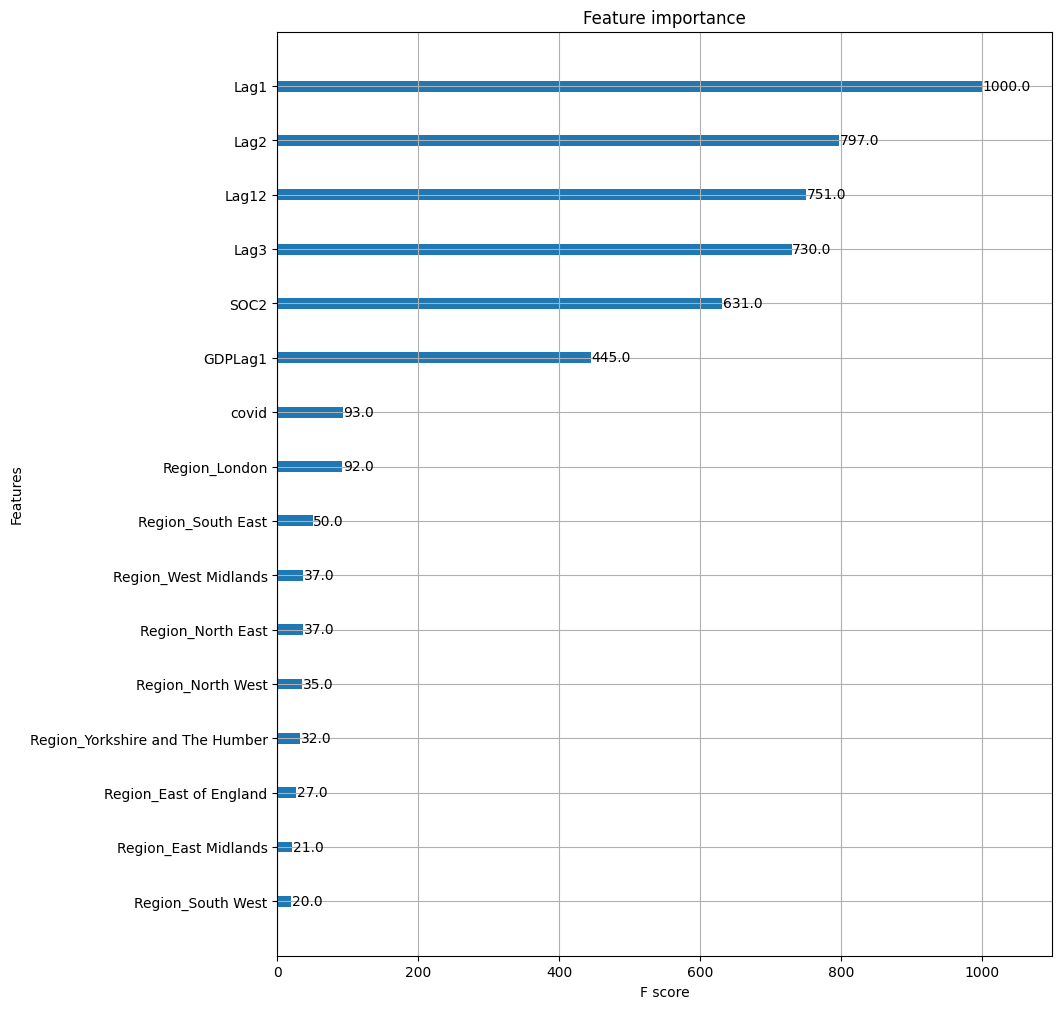

In [80]:
fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(basemodel, ax=ax)
plt.show()

In [81]:
predicted_df = pd.DataFrame({'Value': predict_train, "Region": df_t20_ts_predict.Region.values,"SOC2": df_t20_ts_predict["SOC2"].values, "Type": "Predicted"}, index=train_agg_X.index)
actual_df = pd.DataFrame({'Value': train_agg_y["Data"].values, "Region": df_t20_ts_predict.Region.values,"SOC2": df_t20_ts_predict["SOC2"].values, "Type": "Actual"}, index=train_agg_X.index)
predicted_df.shape, actual_df.shape

((18018, 4), (18018, 4))

In [82]:
group_df = pd.concat([actual_df, predicted_df], axis=0)
group_df

Value                    Region  SOC2       Type
Date                                                         
2017-01-01  2325.0             East Midlands    11     Actual
2017-01-01  1405.0             East Midlands    12     Actual
2017-01-01  5000.0             East Midlands    21     Actual
2017-01-01  2580.0             East Midlands    22     Actual
2017-01-01  2090.0             East Midlands    23     Actual
...            ...                       ...   ...        ...
2023-05-01  1420.0  Yorkshire and The Humber    72  Predicted
2023-05-01  2145.0  Yorkshire and The Humber    81  Predicted
2023-05-01  1653.0  Yorkshire and The Humber    82  Predicted
2023-05-01   817.0  Yorkshire and The Humber    91  Predicted
2023-05-01  5387.0  Yorkshire and The Humber    92  Predicted

[36036 rows x 4 columns]

#### Results - Plot: Training Dataset

In [83]:
group_df_2_Region= group_df.groupby(["Date","Region","Type"])["Value"].sum().reset_index()

In [84]:
group_df_2= group_df.groupby(["Date","SOC2","Type"])["Value"].sum().reset_index()

In [85]:
fig = px.line(group_df_2, x="Date", y='Value', line_dash='Type', color = "SOC2" ,title=f'Total NEW ADS by SOC2 - ALL Region')
fig.update_layout(height=800, width=1000)
fig.show()

It's on Training dataset!!

## Prediction 2025

Because we use laggings, we will predict month by month, refresh the laggings and assume that the prediction is good.

In [86]:
test_agg_X2 = test_agg_X.copy() # Dataset with all the months to predict

In [87]:
test_agg_X.head()

SOC2  Region_East Midlands  Region_East of England  Region_London  \
Date                                                                            
2023-06-01    11                   1.0                     0.0            0.0   
2023-06-01    12                   1.0                     0.0            0.0   
2023-06-01    21                   1.0                     0.0            0.0   
2023-06-01    22                   1.0                     0.0            0.0   
2023-06-01    23                   1.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2023-06-01                              0.0      0  2255.0  1815.0  2165.0   
2023-06-01                              0.0      0  1495.0  1255.0  1540.0   
2023-06-01                              0.0      0  4025.0  3200.0  4030.0   
2023-06-01                              0.0      0  4240.0  3425.0  4120.0   
2023-06-01                              0.0      0  2530.0  1875.0  2580.0   

             Lag12  GDPLag1  
Date                         
2023-06-01  2950.0      0.2  
2023-06-01  1785.0      0.2  
2023-06-01  5065.0      0.2  
2023-06-01  4255.0      0.2  
2023-06-01  1970.0      0.2

In [88]:
rows_per_month_REGION

234

In [89]:
total_months_predict= int(test_agg_X.shape[0]/(rows_per_month_REGION))
total_months_predict

31

In [90]:
test_agg_X = prediction_data.drop(columns = ["Data","Training","Region"])
test_agg_X

SOC2  Region_East Midlands  Region_East of England  Region_London  \
Date                                                                            
2023-06-01    11                   1.0                     0.0            0.0   
2023-06-01    12                   1.0                     0.0            0.0   
2023-06-01    21                   1.0                     0.0            0.0   
2023-06-01    22                   1.0                     0.0            0.0   
2023-06-01    23                   1.0                     0.0            0.0   
...          ...                   ...                     ...            ...   
2025-12-01    72                   0.0                     0.0            0.0   
2025-12-01    81                   0.0                     0.0            0.0   
2025-12-01    82                   0.0                     0.0            0.0   
2025-12-01    91                   0.0                     0.0            0.0   
2025-12-01    92                   0.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
2023-06-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   
2023-06-01                0.0                   0.0   
...                       ...                   ...   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2023-06-01                              0.0      0  2255.0  1815.0  2165.0   
2023-06-01                              0.0      0  1495.0  1255.0  1540.0   
2023-06-01                              0.0      0  4025.0  3200.0  4030.0   
2023-06-01                              0.0      0  4240.0  3425.0  4120.0   
2023-06-01                              0.0      0  2530.0  1875.0  2580.0   
...                                     ...    ...     ...     ...     ...   
2025-12-01                              1.0      0     NaN     NaN     NaN   
2025-12-01                              1.0      0     NaN     NaN     NaN   
2025-12-01                              1.0      0     NaN     NaN     NaN   
2025-12-01                              1.0      0     NaN     NaN     NaN   
2025-12-01                              1.0      0     NaN     NaN     NaN   

             Lag12  GDPLag1  
Date                         
2023-06-01  2950.0     0.20  
2023-06-01  1785.0     0.20  
2023-06-01  5065.0     0.20  
2023-06-01  4255.0     0.20  
2023-06-01  1970.0     0.20  
...            ...      ...  
2025-12-01     NaN     0.42  
2025-12-01     NaN     0.42  
202

In [91]:
test_agg_X["Prediction"] = -9999

In [92]:
# Logic to run 1 by 1 the predictions and use the predicted values as laggings for Future!

for x in range(1, total_months_predict + 1):

    df_tmp = test_agg_X.iloc[(x-1)*rows_per_month_REGION:x*rows_per_month_REGION]
    df_tmp.drop(columns = "Prediction", inplace = True)
    
    predict_val= np.round(basemodel.predict(df_tmp)).tolist()
    
    #Changing predictions on test_agg_X
    test_agg_X.loc[(x-1)*rows_per_month_REGION:x*rows_per_month_REGION, "Prediction"] = predict_val
    
    #Changing Lags with predictions on test_agg_X
    if x+11 < total_months_predict:
        test_agg_X.loc[x*rows_per_month_REGION:x*rows_per_month_REGION+rows_per_month_REGION, "Lag1"] = predict_val
        test_agg_X.loc[x*rows_per_month_REGION+rows_per_month_REGION:x*rows_per_month_REGION+rows_per_month_REGION * 2, "Lag2"] = predict_val
        test_agg_X.loc[x*rows_per_month_REGION+rows_per_month_REGION * 2:x*rows_per_month_REGION+rows_per_month_REGION * 3, "Lag3"] = predict_val
        test_agg_X.loc[x*rows_per_month_REGION+rows_per_month_REGION * 11:x*rows_per_month_REGION+rows_per_month_REGION * 12, "Lag12"] = predict_val
    
    elif x+2 < total_months_predict:
        test_agg_X.loc[x*rows_per_month_REGION:x*rows_per_month_REGION+rows_per_month_REGION, "Lag1"] = predict_val
        test_agg_X.loc[x*rows_per_month_REGION+rows_per_month_REGION:x*rows_per_month_REGION+rows_per_month_REGION * 2, "Lag2"] = predict_val
        test_agg_X.loc[x*rows_per_month_REGION+rows_per_month_REGION * 2:x*rows_per_month_REGION+rows_per_month_REGION * 3, "Lag3"] = predict_val
    
    elif x+1 < total_months_predict:
        test_agg_X.loc[x*rows_per_month_REGION:x*rows_per_month_REGION+rows_per_month_REGION, "Lag1"] = predict_val
        test_agg_X.loc[x*rows_per_month_REGION+rows_per_month_REGION:x*rows_per_month_REGION+rows_per_month_REGION * 2, "Lag2"] = predict_val
        
    elif x < total_months_predict:
        test_agg_X.loc[x*rows_per_month_REGION:x*rows_per_month_REGION+rows_per_month_REGION, "Lag1"] = predict_val

/tmp/ipykernel_140456/75888706.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_140456/75888706.py:11: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:15: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:16: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:17: FutureWarning:

Slicing a positional slice with .loc is not

/tmp/ipykernel_140456/75888706.py:11: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:15: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:16: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:17: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:18: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  

/tmp/ipykernel_140456/75888706.py:11: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:21: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:22: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:23: FutureWarning:

Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.

/tmp/ipykernel_140456/75888706.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [93]:
## Validating that is doing the Lagging properly:

In [94]:
# At the Beggining
prediction_06_23 = test_agg_X.loc["2023-06-01"]["Prediction"].values
Lag1_07_23 = test_agg_X.loc["2023-07-01"]["Lag1"].values
Lag2_08_23 = test_agg_X.loc["2023-08-01"]["Lag2"].values
Lag3_09_23 = test_agg_X.loc["2023-09-01"]["Lag3"].values
Lag12_06_24 = test_agg_X.loc["2024-06-01"]["Lag12"].values


are_equal = np.array_equal(prediction_06_23, Lag1_07_23)
are_equal2 = np.array_equal(prediction_06_23, Lag2_08_23)
are_equal3 = np.array_equal(prediction_06_23, Lag3_09_23)
are_equal12 = np.array_equal(prediction_06_23, Lag12_06_24)
assert (are_equal * are_equal2 * are_equal3 * are_equal12)

In [95]:
# In the middle:
prediction_08_24 = test_agg_X.loc["2024-08-01"]["Prediction"].values
Lag1_09_24 = test_agg_X.loc["2024-09-01"]["Lag1"].values
Lag2_10_24 = test_agg_X.loc["2024-10-01"]["Lag2"].values
Lag3_11_24 = test_agg_X.loc["2024-11-01"]["Lag3"].values
Lag12_08_25 = test_agg_X.loc["2025-08-01"]["Lag12"].values


are_equal = np.array_equal(prediction_08_24, Lag1_09_24)
are_equal2 = np.array_equal(prediction_08_24, Lag2_10_24)
are_equal3 = np.array_equal(prediction_08_24, Lag3_11_24)
are_equal12 = np.array_equal(prediction_08_24, Lag12_08_25)
assert (are_equal * are_equal2 * are_equal3 * are_equal12)

In [96]:
# At the end:
prediction_11_25 = test_agg_X.loc["2025-11-01"]["Prediction"].values
prediction_10_25 = test_agg_X.loc["2025-10-01"]["Prediction"].values
prediction_09_25 = test_agg_X.loc["2025-09-01"]["Prediction"].values
prediction_12_24 = test_agg_X.loc["2024-12-01"]["Prediction"].values
Lag12_12_25 = test_agg_X.loc["2025-12-01"]["Lag12"].values
Lag3_11_25 = test_agg_X.loc["2025-12-01"]["Lag3"].values
Lag2_12_25 = test_agg_X.loc["2025-12-01"]["Lag2"].values
Lag1_12_25 = test_agg_X.loc["2025-12-01"]["Lag1"].values

are_equal = np.array_equal(prediction_11_25, Lag1_12_25)
are_equal2 = np.array_equal(prediction_10_25, Lag2_12_25)
are_equal3 = np.array_equal(prediction_09_25, Lag3_11_25)
are_equal12 = np.array_equal(prediction_12_24, Lag12_12_25)
assert are_equal * are_equal2 * are_equal3 *  are_equal12

In [97]:
test_agg_X.loc["2025-12-01"]

SOC2  Region_East Midlands  Region_East of England  Region_London  \
Date                                                                            
2025-12-01    11                   1.0                     0.0            0.0   
2025-12-01    12                   1.0                     0.0            0.0   
2025-12-01    21                   1.0                     0.0            0.0   
2025-12-01    22                   1.0                     0.0            0.0   
2025-12-01    23                   1.0                     0.0            0.0   
...          ...                   ...                     ...            ...   
2025-12-01    72                   0.0                     0.0            0.0   
2025-12-01    81                   0.0                     0.0            0.0   
2025-12-01    82                   0.0                     0.0            0.0   
2025-12-01    91                   0.0                     0.0            0.0   
2025-12-01    92                   0.0                     0.0            0.0   

            Region_North East  Region_North West  Region_South East  \
Date                                                                  
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
...                       ...                ...                ...   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   
2025-12-01                0.0                0.0                0.0   

            Region_South West  Region_West Midlands  \
Date                                                  
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
...                       ...                   ...   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   
2025-12-01                0.0                   0.0   

            Region_Yorkshire and The Humber  covid    Lag1    Lag2    Lag3  \
Date                                                                         
2025-12-01                              0.0      0  2322.0  2296.0  2322.0   
2025-12-01                              0.0      0  1715.0  1626.0  1700.0   
2025-12-01                              0.0      0  4913.0  4732.0  4900.0   
2025-12-01                              0.0      0  5048.0  5021.0  4989.0   
2025-12-01                              0.0      0  2333.0  2226.0  2238.0   
...                                     ...    ...     ...     ...     ...   
2025-12-01                              1.0      0  1566.0  1469.0  1415.0   
2025-12-01                              1.0      0  2243.0  2213.0  2200.0   
2025-12-01                              1.0      0  1682.0  1633.0  1676.0   
2025-12-01                              1.0      0   759.0   741.0   795.0   
2025-12-01                              1.0      0  5856.0  6267.0  5668.0   

             Lag12  GDPLag1  Prediction  
Date                                     
2025-12-01  2257.0     0.42      2280.0  
2025-12-01  1604.0     0.42      1709.0  
2025-12-01  4852.0     0.42      4867.0  
2025-12-01  4667.0     0.42      5048.0  
2025-12-01  2024.0     0.42      2277.0  
...      

## Plotting Results

In [98]:
predicted_df_2 = pd.DataFrame({'Value': test_agg_X.Prediction, "Region": prediction_data.Region.values,"SOC2": prediction_data["SOC2"].values, "Type": "Predicted"}, index=test_agg_X.index)
predicted_df_2

Value                    Region  SOC2       Type
Date                                                         
2023-06-01  2307.0             East Midlands    11  Predicted
2023-06-01  1456.0             East Midlands    12  Predicted
2023-06-01  3716.0             East Midlands    21  Predicted
2023-06-01  3970.0             East Midlands    22  Predicted
2023-06-01  2056.0             East Midlands    23  Predicted
...            ...                       ...   ...        ...
2025-12-01  1453.0  Yorkshire and The Humber    72  Predicted
2025-12-01  2129.0  Yorkshire and The Humber    81  Predicted
2025-12-01  1642.0  Yorkshire and The Humber    82  Predicted
2025-12-01   779.0  Yorkshire and The Humber    91  Predicted
2025-12-01  6416.0  Yorkshire and The Humber    92  Predicted

[7254 rows x 4 columns]

### Results by SOC 2:

In [99]:
group_df_2_pdf_2= predicted_df_2.groupby(["Date","SOC2","Type"])["Value"].sum().reset_index()

In [100]:
fig = px.line(group_df_2_pdf_2, x="Date", y='Value', line_dash='Type', color = "SOC2" ,title=f'Total NEW ADS by SOC2 - ALL Region')
fig.update_layout(height=800, width=1600)
fig.show()

### Plot: Training + Prediction

In [101]:
# Joining results from training with the predictions:

plot_TPred = group_df_2.append(group_df_2_pdf_2)
plot_TPred

/tmp/ipykernel_140456/2181408557.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Date  SOC2       Type    Value
0   2017-01-01    11     Actual  42480.0
1   2017-01-01    11  Predicted  42696.0
2   2017-01-01    12     Actual  25740.0
3   2017-01-01    12  Predicted  28755.0
4   2017-01-01    21     Actual  96405.0
..         ...   ...        ...      ...
801 2025-12-01    72  Predicted  17888.0
802 2025-12-01    81  Predicted  25147.0
803 2025-12-01    82  Predicted  22887.0
804 2025-12-01    91  Predicted   8812.0
805 2025-12-01    92  Predicted  76484.0

[4810 rows x 4 columns]

In [102]:
fig = px.line(plot_TPred, x="Date", y='Value', line_dash='Type', color = "SOC2" ,title=f'Total NEW ADS by SOC2 - ALL Regions')
fig.update_layout(height=700, width=1600)
fig.show()

In [103]:
group_df_2_REGION_2= predicted_df_2.groupby(["Date","Region","Type"])["Value"].sum().reset_index()

In [104]:
plot_TPred_Region = group_df_2_Region.append(group_df_2_REGION_2)
plot_TPred_Region

/tmp/ipykernel_140456/879061257.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



Date                    Region       Type     Value
0   2017-01-01             East Midlands     Actual   54535.0
1   2017-01-01             East Midlands  Predicted   58002.0
2   2017-01-01           East of England     Actual   80365.0
3   2017-01-01           East of England  Predicted   82994.0
4   2017-01-01                    London     Actual  249350.0
..         ...                       ...        ...       ...
274 2025-12-01                North West  Predicted  114417.0
275 2025-12-01                South East  Predicted  174203.0
276 2025-12-01                South West  Predicted   94445.0
277 2025-12-01             West Midlands  Predicted   83364.0
278 2025-12-01  Yorkshire and The Humber  Predicted   73272.0

[1665 rows x 4 columns]

In [105]:
fig = px.line(plot_TPred_Region, x="Date", y='Value', line_dash='Type', color = "Region" ,title=f'Total NEW ADS by Region - ALL SOC')
fig.update_layout(height=600, width=1600)
fig.show()

### Results by SOC 2:

In [106]:
soc2 = 21

In [107]:
plt_2soc = plot_TPred[(plot_TPred['SOC2'] == soc2)]
plt_2soc.head()

Date  SOC2       Type    Value
4   2017-01-01    21     Actual  96405.0
5   2017-01-01    21  Predicted  90599.0
56  2017-02-01    21     Actual  76780.0
57  2017-02-01    21  Predicted  77527.0
108 2017-03-01    21     Actual  93310.0

In [108]:
fig = px.line(plt_2soc.groupby(["Date","Type"])["Value"].sum().reset_index(), x="Date", y='Value', line_dash='Type', title=f'Total NEW ADS {soc2} - ALL LSIP')
fig.update_layout(height=700, width=1600)
fig.show()

### By SOC2 per Region

In [109]:
plt_all = group_df.append(predicted_df_2)

/tmp/ipykernel_140456/3269397095.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [110]:
fig = px.line(plt_all[plt_all["SOC2"]== soc2], x = plt_all[plt_all["SOC2"]== soc2].index, y='Value', line_dash='Type', color = "Region",title=f'Total NEW ADS {soc2} Per Region')
fig.update_layout(height=700, width=1600)
fig.show()

# Inspecting Results:

In [111]:
def assign_values(index_date):
    reference_dates = ['2023-06-01', '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01', 
                       '2024-01-01','2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01','2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01',
                       '2025-01-01','2025-02-01', '2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01', '2025-08-01','2025-09-01', '2025-10-01', '2025-11-01', '2025-12-01']
    values = [1, 2, 3, 4, 5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]

    for ref_date, value in zip(reference_dates, values):
        if index_date == pd.to_datetime(ref_date):
            return value
    return None

In [112]:
# Creating Month_predicted to have more interpretable results:
df = predicted_df_2.copy()
df["Region-SOC2"] =df["Region"] + "-SOC" + df["SOC2"].astype(str)
df

Value                    Region  SOC2       Type  \
Date                                                            
2023-06-01  2307.0             East Midlands    11  Predicted   
2023-06-01  1456.0             East Midlands    12  Predicted   
2023-06-01  3716.0             East Midlands    21  Predicted   
2023-06-01  3970.0             East Midlands    22  Predicted   
2023-06-01  2056.0             East Midlands    23  Predicted   
...            ...                       ...   ...        ...   
2025-12-01  1453.0  Yorkshire and The Humber    72  Predicted   
2025-12-01  2129.0  Yorkshire and The Humber    81  Predicted   
2025-12-01  1642.0  Yorkshire and The Humber    82  Predicted   
2025-12-01   779.0  Yorkshire and The Humber    91  Predicted   
2025-12-01  6416.0  Yorkshire and The Humber    92  Predicted   

                               Region-SOC2  
Date                                        
2023-06-01             East Midlands-SOC11  
2023-06-01             East Midlands-SOC12  
2023-06-01             East Midlands-SOC21  
2023-06-01             East Midlands-SOC22  
2023-06-01             East Midlands-SOC23  
...                                    ...  
2025-12-01  Yorkshire and The Humber-SOC72  
2025-12-01  Yorkshire and The Humber-SOC81  
2025-12-01  Yorkshire and The Humber-SOC82  
2025-12-01  Yorkshire and The Humber-SOC91  
2025-12-01  Yorkshire and The Humber-SOC92  

[7254 rows x 5 columns]

In [113]:
df['Month_Predicted'] = df.index.map(assign_values)
df

Value                    Region  SOC2       Type  \
Date                                                            
2023-06-01  2307.0             East Midlands    11  Predicted   
2023-06-01  1456.0             East Midlands    12  Predicted   
2023-06-01  3716.0             East Midlands    21  Predicted   
2023-06-01  3970.0             East Midlands    22  Predicted   
2023-06-01  2056.0             East Midlands    23  Predicted   
...            ...                       ...   ...        ...   
2025-12-01  1453.0  Yorkshire and The Humber    72  Predicted   
2025-12-01  2129.0  Yorkshire and The Humber    81  Predicted   
2025-12-01  1642.0  Yorkshire and The Humber    82  Predicted   
2025-12-01   779.0  Yorkshire and The Humber    91  Predicted   
2025-12-01  6416.0  Yorkshire and The Humber    92  Predicted   

                               Region-SOC2  Month_Predicted  
Date                                                         
2023-06-01             East Midlands-SOC11                1  
2023-06-01             East Midlands-SOC12                1  
2023-06-01             East Midlands-SOC21                1  
2023-06-01             East Midlands-SOC22                1  
2023-06-01             East Midlands-SOC23                1  
...                                    ...              ...  
2025-12-01  Yorkshire and The Humber-SOC72               31  
2025-12-01  Yorkshire and The Humber-SOC81               31  
2025-12-01  Yorkshire and The Humber-SOC82               31  
2025-12-01  Yorkshire and The Humber-SOC91               31  
2025-12-01  Yorkshire and The Humber-SOC92               31  

[7254 rows x 6 columns]

<b> Running Linear Models on each SOC2 prediction (06/2023 to 12/2025) to find the TREND (Coefficient) for the predicted time

In [114]:
from sklearn.linear_model import LinearRegression

# Create an empty DataFrame to store the regression results
regression_results = pd.DataFrame(columns=['Region-SOC2', 'Intercept', 'Coefficient'])

# Group the data by SOC2 and perform linear regression for each group
for soc4, group_df in df.groupby('Region-SOC2'):
    X = group_df.Month_Predicted.values.reshape(-1, 1)  # Reshape index values for linear regression
    y = group_df['Value'].values
    
    # Fit linear regression model
    model = LinearRegression()
    model.fit(X, y)
    
    # Store the results in the regression_results DataFrame
    regression_results = regression_results.append({
        'Region-SOC2': soc4,
        'Intercept': model.intercept_,
        'Coefficient': model.coef_[0]
    }, ignore_index=True)

# Print the regression results
print(regression_results)

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

                        Region-SOC2    Intercept  Coefficient
0               East Midlands-SOC11  2505.696774   -11.839919
1               East Midlands-SOC12  1633.683871    -2.236290
2               East Midlands-SOC21  4559.380645     3.030645
3               East Midlands-SOC22  4372.019355    11.145968
4               East Midlands-SOC23  2226.238710    -1.420161
..                              ...          ...          ...
229  Yorkshire and The Humber-SOC72  1493.690323    -5.641935
230  Yorkshire and The Humber-SOC81  2409.458065   -13.593145
231  Yorkshire and The Humber-SOC82  1956.761290   -14.517339
232  Yorkshire and The Humber-SOC91   879.212903    -6.781452
233  Yorkshire and The Humber-SOC92  5428.361290     9.513710

[234 rows x 3 columns]


/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/tmp/ipykernel_140456/3323829202.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas

In [115]:
sorted_results = regression_results.sort_values(by='Coefficient', ascending=False)
sorted_results.head(5)

Region-SOC2     Intercept  Coefficient
54       London-SOC21  24577.974194    95.675000
62       London-SOC35  27349.503226    89.752823
57       London-SOC24  25808.877419    87.447177
155  South East-SOC92  12150.277419    78.966532
77       London-SOC92  10097.793548    67.621774

## Creating Index - Importance of Region - SOC2 : Weighting Coefficients 

<b> Region-SOC2 Importance: (Coefficients Region-SOC2 * Total amount of NEW jobs Region-SOC2 expected on 2025) / Total amount of NEW JOBS 2025

In [116]:
sorted_results = regression_results.sort_values(by='Coefficient', ascending=False)
sorted_results['SOC2'] = sorted_results['Region-SOC2'].str[-2:]
sorted_results['SOC2'] = sorted_results["SOC2"].astype(int)

In [117]:
names = df_t20[["SOC 2 digit code", "SOC 2 digit label"]].iloc[:26,]

In [118]:
sorted_results.head(2)

Region-SOC2     Intercept  Coefficient  SOC2
54  London-SOC21  24577.974194    95.675000    21
62  London-SOC35  27349.503226    89.752823    35

In [119]:
#Adding the Value (Predicted Amount of new jobs per SOC2 in 2025 )
sorted_results = sorted_results.merge(df[df.index >= "2025-01-01"].groupby("Region-SOC2").sum()[["Value"]].reset_index(), left_on= "Region-SOC2", right_on="Region-SOC2", how ="left")

In [120]:
sorted_results["WeightedRoles"]=  (sorted_results["Value"]*(sorted_results["Coefficient"]))/sorted_results["Value"].sum()

In [121]:
sorted_results.sort_values(by='WeightedRoles', ascending=False).head(20).reset_index()

index                     Region-SOC2     Intercept  Coefficient  SOC2  \
0       1                    London-SOC35  27349.503226    89.752823    35   
1       0                    London-SOC21  24577.974194    95.675000    21   
2       2                    London-SOC24  25808.877419    87.447177    24   
3       3                South East-SOC92  12150.277419    78.966532    92   
4       4                    London-SOC92  10097.793548    67.621774    92   
5       5                South East-SOC52   8426.903226    41.735887    52   
6       6                North West-SOC22   7274.670968    29.371371    22   
7      15                South East-SOC22  10940.458065    15.644758    22   
8       7                South East-SOC23   5440.870968    27.913306    23   
9      10                    London-SOC31   7570.103226    20.795968    31   
10     19                    London-SOC22  11026.574194    13.377419    22   
11      8                South West-SOC52   5259.903226    22.096774    52   
12      9  Yorkshire and The Humber-SOC24   5339.954839    20.841532    24   
13     12             West Midlands-SOC22   5418.490323    18.773790    22   
14     11  Yorkshire and The Humber-SOC22   4590.432258    19.271371    22   
15     18           East of England-SOC22   6446.322581    14.284274    22   
16     14             West Midlands-SOC52   5535.729032    15.934274    52   
17     24                North West-SOC92   8347.948387    10.454839    92   
18     17                North West-SOC52   5566.348387    14.458065    52   
19     21                South West-SOC41   6842.696774    11.452419    41   

       Value  WeightedRoles  
0   358434.0       2.974051  
1   325350.0       2.877666  
2   332852.0       2.690842  
3   172970.0       1.262714  
4   144197.0       0.901434  
5   114861.0       0.443173  
6    96863.0       0.263011  
7   136749.0       0.197781  
8    74364.0       0.191896  
9    98300.0       0.188983  
10  136339.0       0.168610  
11   71064.0       0.145168  
12   71526.0       0.137811  
13   71796.0       0.124607  
14   61012.0       0.108697  
15   81574.0       0.107721  
16   71695.0       0.105612  
17  103690.0       0.100218  
18   70863.0       0.094715  
19   85537.0       0.090561

In [122]:
#Adding names:
sorted_results = sorted_results.merge(right = names, how="left", left_on = "SOC2", right_on="SOC 2 digit code")[["Region-SOC2","SOC2","SOC 2 digit label", "Intercept", "Coefficient", "WeightedRoles", "Value" ]]

In [123]:
#Saving Results/Predictions
sorted_results.sort_values(by='SOC2', ascending=True).to_csv('Data/soc2Region_results2025.csv', index=False)